# EDA ON BIHAR_DATA

**Before diving to Exploratory data analysis. We have to figure out what are we expecting. We are searching for patterns of production of different crops in different districts. We will explore the different features of the dataset which is subset of crop_production.csv in the [link](https://www.kaggle.com/abhinand05/crop-production-in-india?select=crop_production.csv). First we go for univariate analysis. Then will go for bivariate analysis. And finally we will see a pattern of relationship between production and area.**
<img src="https://mk0egoveletsonla87wv.kinstacdn.com/wp-content/uploads/2016/04/Bihar_Government_Logo.jpg" alt="Bihar agriculture" width="250"/>

In [1]:
# Modules ----

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import PIL as pil
import tensorflow as tf
import keras 
import torch
import torchvision
import random
random.seed(0)
np.random.seed(0)
%matplotlib inline

In [2]:
# Loading data ----

bihar_data = pd.read_csv('D:\SIH\Ann-Aztecs\Bihar_data.csv')

In [3]:
bihar_data.head()

,Unnamed: 0,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,27005,Bihar,ARARIA,1997,Autumn,Rice,17876.0,21397.0
1,27006,Bihar,ARARIA,1997,Kharif,Arhar/Tur,354.0,426.0
2,27007,Bihar,ARARIA,1997,Kharif,Dry ginger,78.0,110.0
3,27008,Bihar,ARARIA,1997,Kharif,Groundnut,8.0,10.0
4,27009,Bihar,ARARIA,1997,Kharif,Jute,39159.0,493403.0


In [4]:
bihar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18885 non-null  int64  
 1   State_Name     18885 non-null  object 
 2   District_Name  18885 non-null  object 
 3   Crop_Year      18885 non-null  int64  
 4   Season         18885 non-null  object 
 5   Crop           18885 non-null  object 
 6   Area           18885 non-null  float64
 7   Production     18874 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.2+ MB


In [5]:
bihar_data = bihar_data.dropna(axis=0)

In [6]:
bihar_data['Production_per_100000'] = bihar_data['Production']/100000
bihar_data['Area_per_100000'] = bihar_data['Area']/100000

# Univariate Analysis

In [7]:
unique_district = bihar_data.District_Name.unique()
unique_season = bihar_data.Season.unique()
unique_crop = bihar_data.Crop.unique()
years = bihar_data.Crop_Year.unique()

In [8]:
print(len(unique_district))
print(unique_district)

38
['ARARIA' 'ARWAL' 'AURANGABAD' 'BANKA' 'BEGUSARAI' 'BHAGALPUR' 'BHOJPUR'
 'BUXAR' 'DARBHANGA' 'GAYA' 'GOPALGANJ' 'JAMUI' 'JEHANABAD'
 'KAIMUR (BHABUA)' 'KATIHAR' 'KHAGARIA' 'KISHANGANJ' 'LAKHISARAI'
 'MADHEPURA' 'MADHUBANI' 'MUNGER' 'MUZAFFARPUR' 'NALANDA' 'NAWADA'
 'PASHCHIM CHAMPARAN' 'PATNA' 'PURBI CHAMPARAN' 'PURNIA' 'ROHTAS'
 'SAHARSA' 'SAMASTIPUR' 'SARAN' 'SHEIKHPURA' 'SHEOHAR' 'SITAMARHI' 'SIWAN'
 'SUPAUL' 'VAISHALI']


In [9]:
print(len(unique_season))
print(unique_season)

6
['Autumn     ' 'Kharif     ' 'Rabi       ' 'Summer     ' 'Whole Year '
 'Winter     ']


In [10]:
print(len(unique_crop))
print(unique_crop)

42
['Rice' 'Arhar/Tur' 'Dry ginger' 'Groundnut' 'Jute' 'Maize' 'Mesta'
 'Other Kharif pulses' 'Sesamum' 'Barley' 'Gram' 'Linseed'
 'Other  Rabi pulses' 'Rapeseed &Mustard' 'Sunflower' 'Wheat' 'Banana'
 'Coriander' 'Dry chillies' 'Garlic' 'Onion' 'Potato' 'Ragi' 'Sannhamp'
 'Sugarcane' 'Sweet potato' 'Turmeric' 'Blackgram' 'Small millets' 'Bajra'
 'Horse-gram' 'Jowar' 'Moong(Green Gram)' 'Urad' 'Khesari' 'Masoor'
 'Peas & beans (Pulses)' 'Tobacco' 'Safflower' 'Castor seed' 'Niger seed'
 'Cotton(lint)']


In [11]:
print(years)

[1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014]


 
 __From above discription of dataset which has 18885 rows and 8 columns. We will analyize bihar agricultural dataset of 38 district. There are total 6 season and total 42 crops listed above. The analysis year is between 1997 to 2014.__
 
 

In [12]:
def col_summary(data,col):
    print("column name :",col)
    if(data[col].dtype == 'float'):
        print("mean :",data[col].mean())
        print("min :",data[col].min())
        print("1 st quantile :",data[col].quantile(0.25))
        print("median :",data[col].median())
        print("3 rd quantile :",data[col].quantile(0.75))
        print("max :",data[col].max())
        
    if(data[col].dtype == 'O'):
        print("total unique counts :",data[col].nunique())
        print("most_frequent :",data[col].mode())
    
    if(data[col].dtype =='int64'):
        if(data[col].nunique()<len(data[col])/25):
            print("total unique counts :",data[col].nunique())
            print("most_frequent :",data[col].mode()[0])
        else:
            print("mean :",data[col].mean())
            print("min :",data[col].min())
            print("1 st quantile :",data[col].quantile(0.25))
            print("median :",data[col].median())
            print("3 rd quantile :",data[col].quantile(0.75))
            print("max :",data[col].max())

In [13]:
col_names = bihar_data.columns

In [14]:
col_summary(bihar_data,col_names[2])

column name : District_Name
total unique counts : 38
most_frequent : 0    BHAGALPUR
dtype: object


In [15]:
col_summary(bihar_data,col_names[3])

column name : Crop_Year
total unique counts : 18
most_frequent : 2003


In [16]:
col_summary(bihar_data,col_names[4])

column name : Season
total unique counts : 6
most_frequent : 0    Rabi       
dtype: object


In [17]:
col_summary(bihar_data,col_names[5])

column name : Crop
total unique counts : 42
most_frequent : 0    Maize
dtype: object


In [18]:
col_summary(bihar_data,col_names[6])

column name : Area
mean : 6796.096693864575
min : 1.0
1 st quantile : 63.0
median : 405.0
3 rd quantile : 2647.0
max : 212760.0


In [19]:
col_summary(bihar_data,col_names[7])

column name : Production
mean : 19417.37822719085
min : 0.0
1 st quantile : 71.0
median : 581.0
3 rd quantile : 5116.75
max : 9614539.0


Text(0.5, 1.0, 'Histogram of log(Area)')

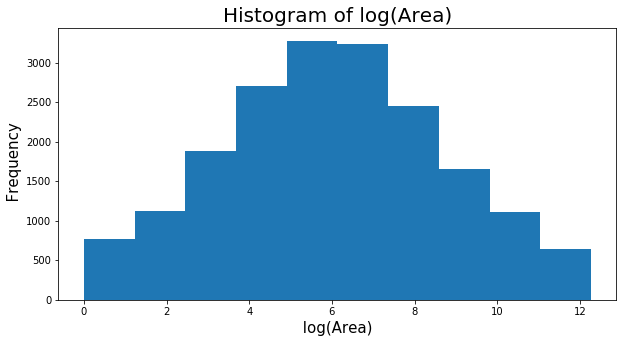

In [20]:
plt.figure(figsize=(10,5))
plt.hist(np.log(bihar_data.Area.values),bins=10)
plt.xlabel(" log(Area) ",fontsize=15)
plt.ylabel("  Frequency ",fontsize=15)
plt.title("Histogram of log(Area)",fontsize=20)

### Histogram shows a normal distribution of log(Area)

Text(0.5, 1.0, 'Histogram of log(Production)')

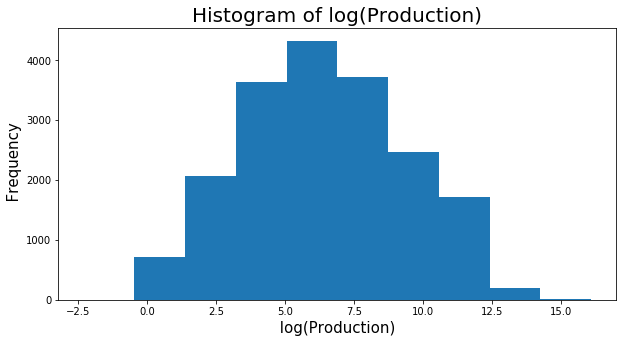

In [21]:
plt.figure(figsize=(10,5))
plt.hist(np.log(bihar_data.Production[bihar_data.Production.values!=0].values),bins=10)
plt.xlabel(" log(Production) ",fontsize=15)
plt.ylabel("  Frequency ",fontsize=15)
plt.title("Histogram of log(Production)",fontsize=20)

### Histogram shows a normal distribution of log(Production)

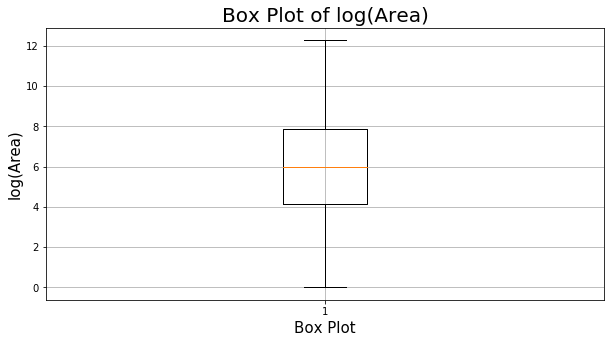

In [22]:
plt.figure(figsize=(10,5))
plt.boxplot(np.log(bihar_data.Area.values))
plt.xlabel("Box Plot",fontsize=15)
plt.ylabel("log(Area)",fontsize=15)
plt.title("Box Plot of log(Area)",fontsize=20)
plt.grid()

#### From above figure, It shows that median of log(Area) is about 6. And there is no outliers.

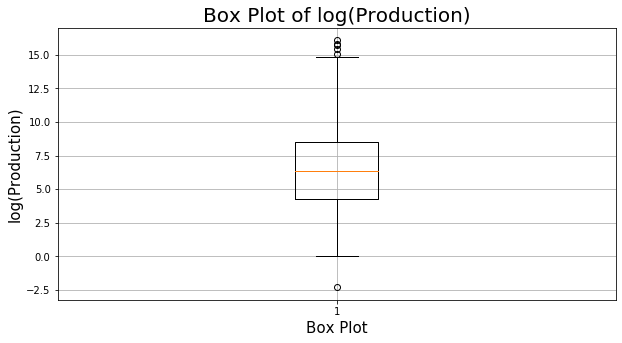

In [23]:
plt.figure(figsize=(10,5))
plt.boxplot(np.log(bihar_data.Production[bihar_data.Production.values!=0].values))
plt.xlabel("Box Plot",fontsize=15)
plt.ylabel("log(Production)",fontsize=15)
plt.title("Box Plot of log(Production)",fontsize=20)
plt.grid()

# Bivariate analysis

#### From above figure, It shows that median of log(Production) is about 6.3. And there are som outliers above 14.9 outliers and one outlier below 0.

Text(0, 0.5, 'Production_per_100000')

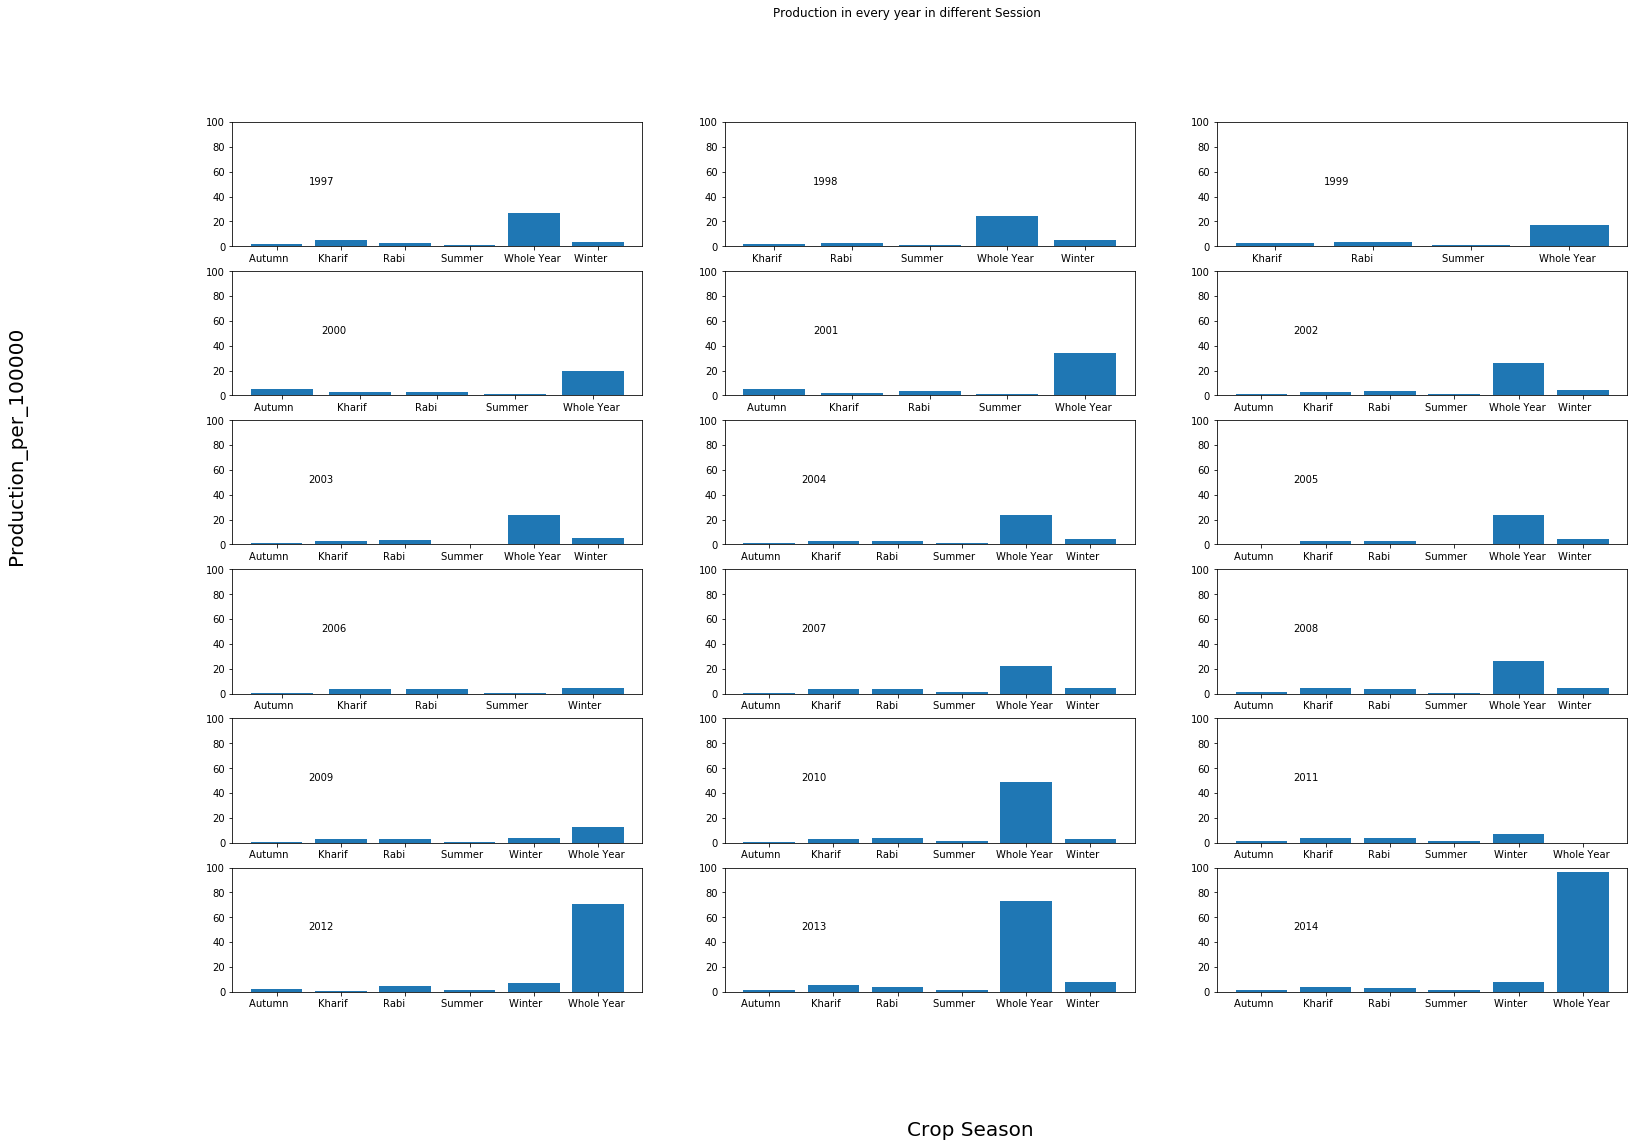

In [24]:
fig = plt.figure(figsize=(25,16))  
for i,year in enumerate(years):
    plt.subplot(6,3,i+1)
    plt.bar('Season','Production_per_100000',data=bihar_data[bihar_data.Crop_Year==year])
    plt.ylim(0,100)
    plt.text(0.5,50,str(year))
 
fig.suptitle("Production in every year in different Session")
fig.text(0.5,0,"Crop Season",fontsize=20)
fig.text(0,0.5,"Production_per_100000",rotation=90,fontsize=20) 

#### Here we see pattern of increasing production (whole year ) every year with an exception of 2009 and 2011. 

In [25]:
group_data = bihar_data.groupby(["District_Name","Crop_Year"])
production_data = group_data['Production_per_100000'].sum()
area_data =  group_data['Area_per_100000'].sum()

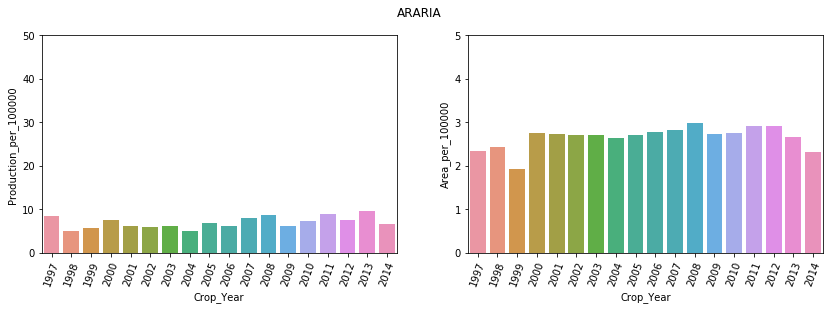

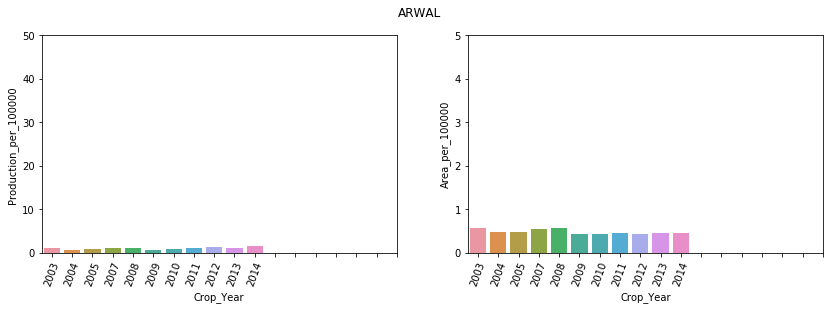

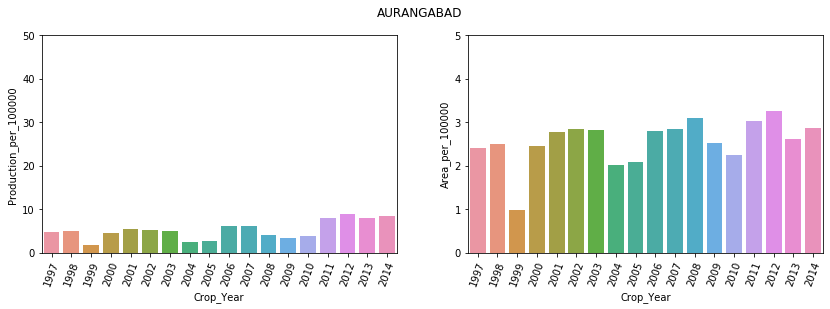

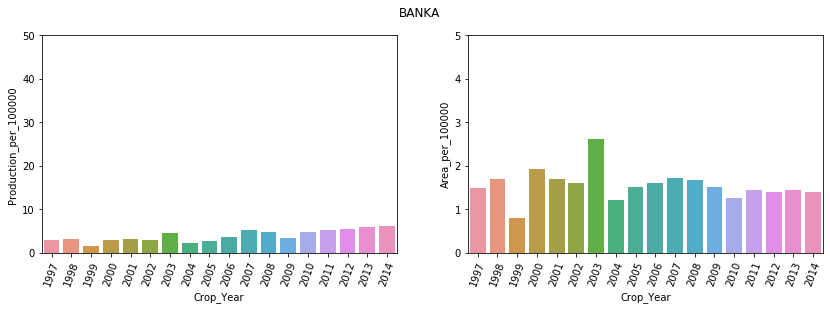

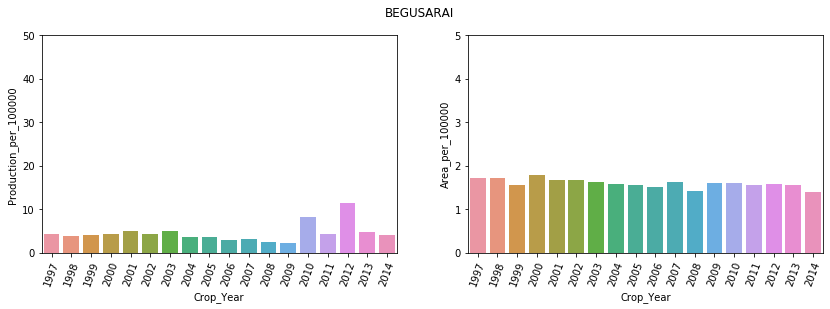

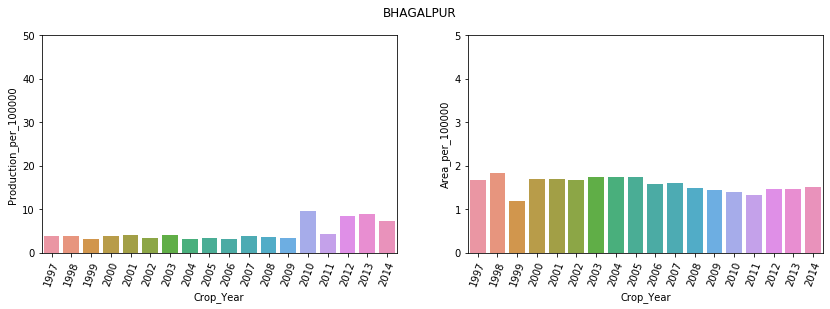

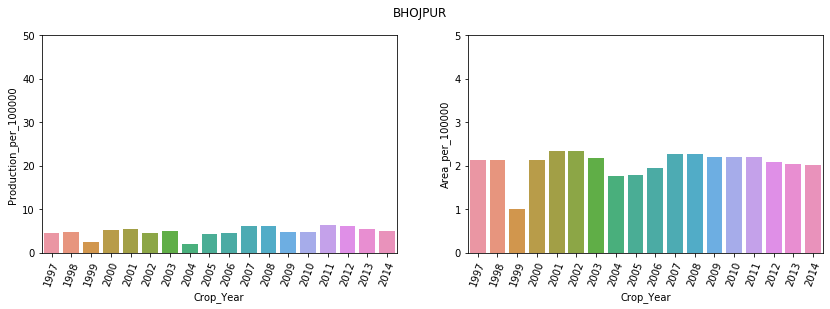

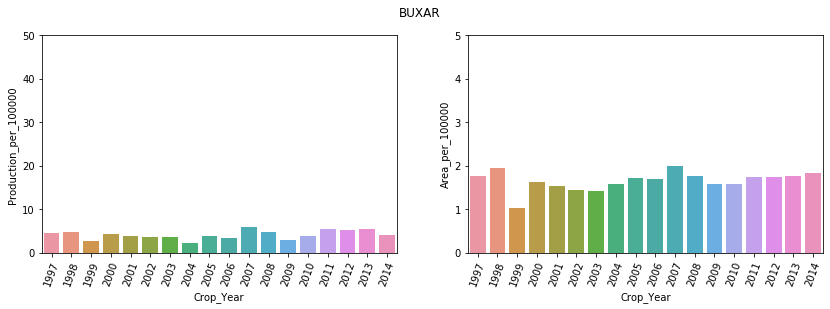

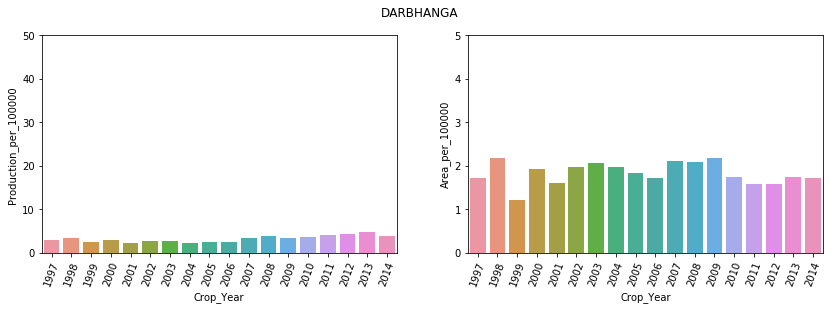

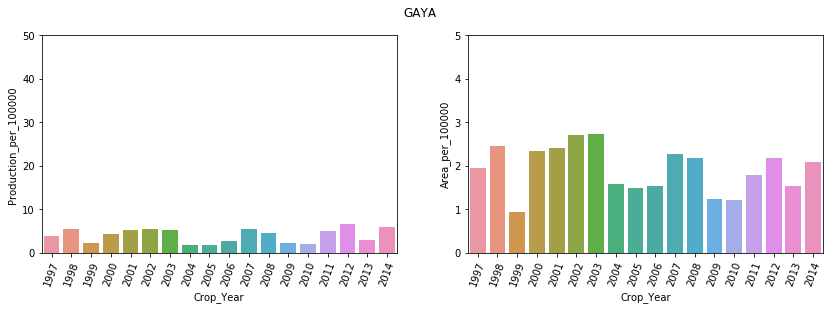

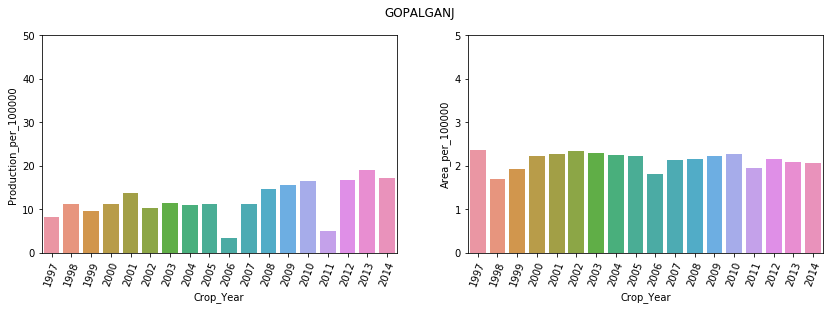

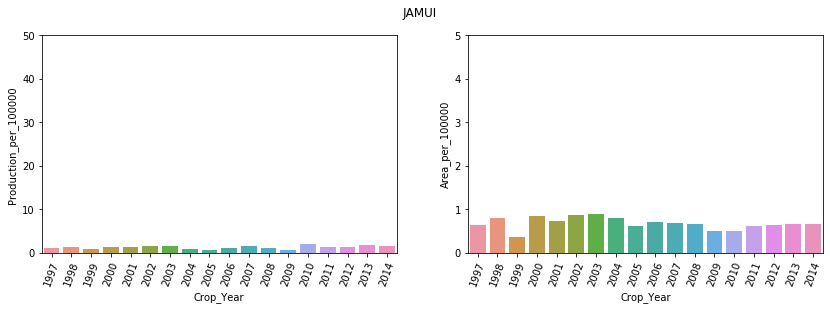

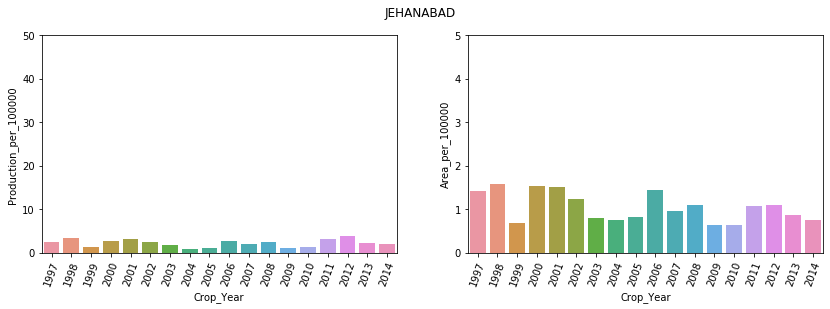

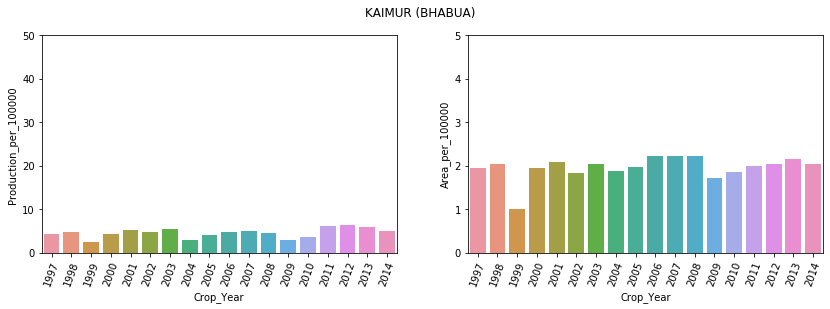

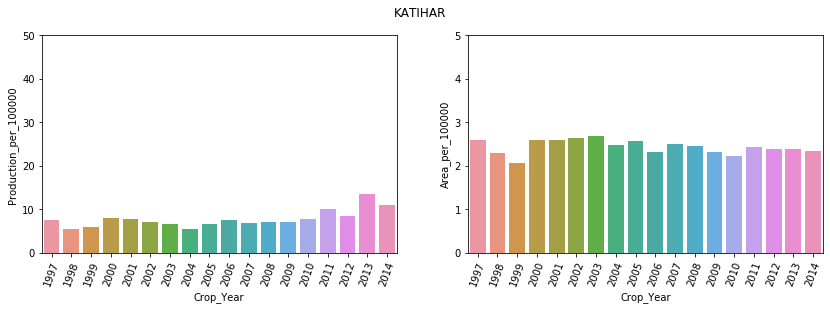

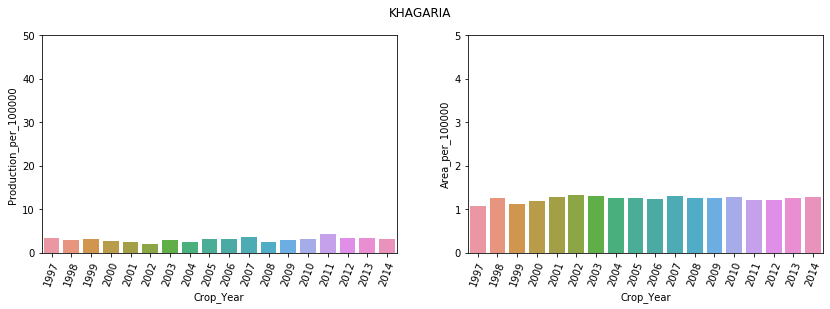

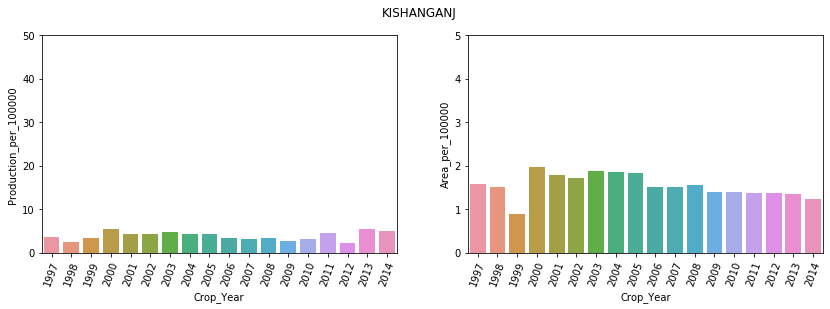

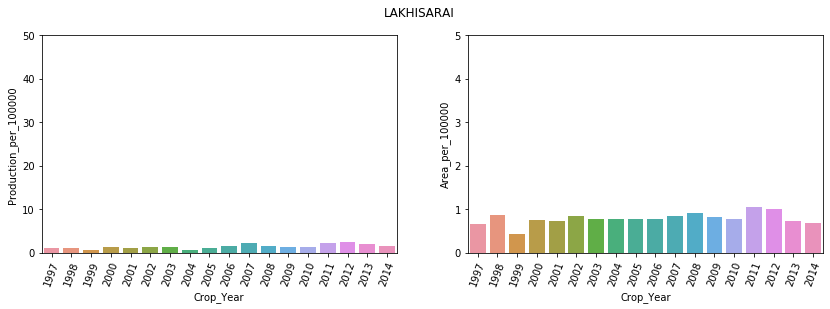

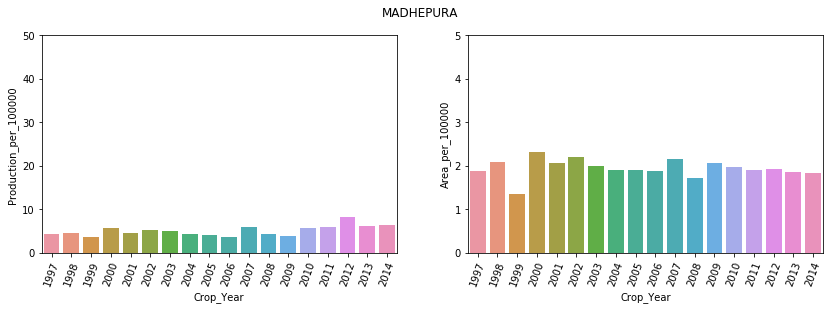

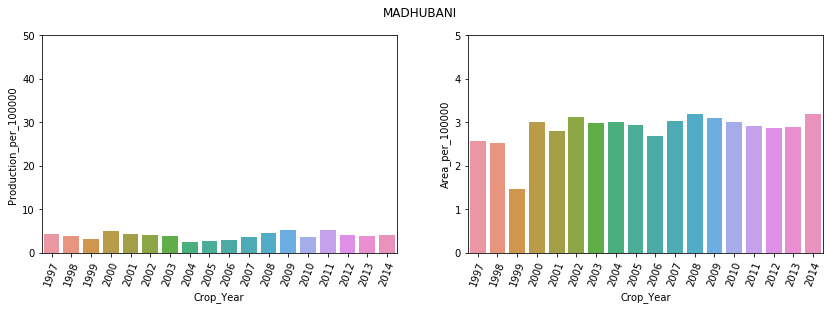

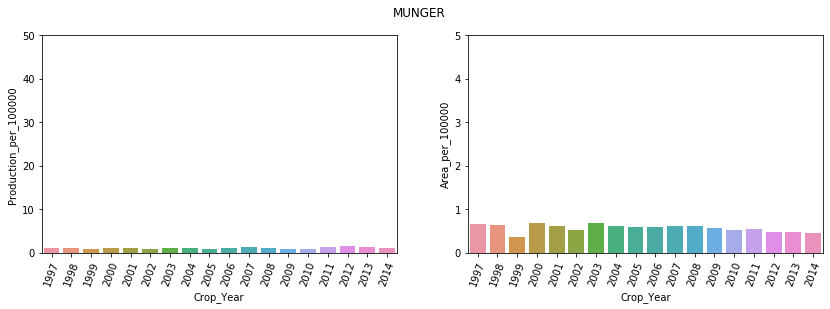

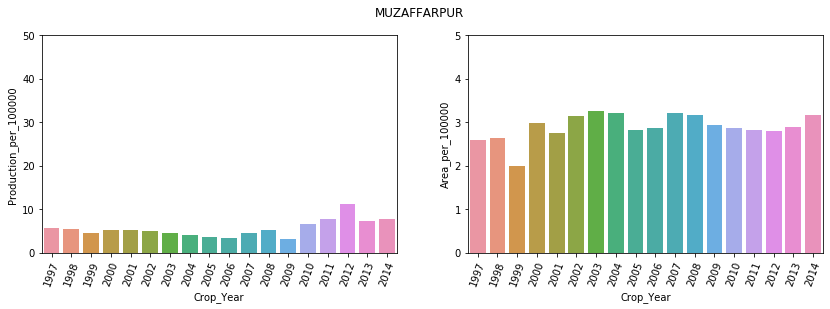

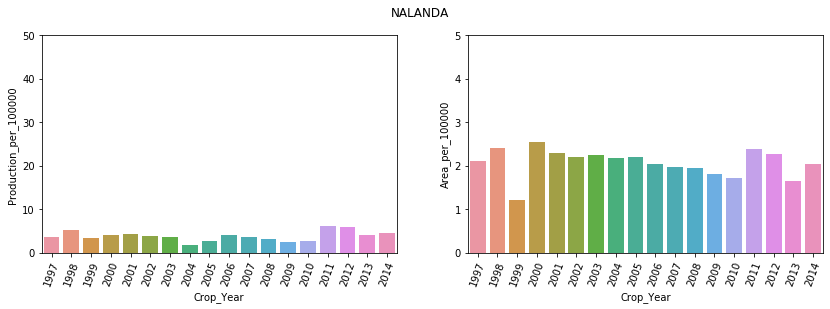

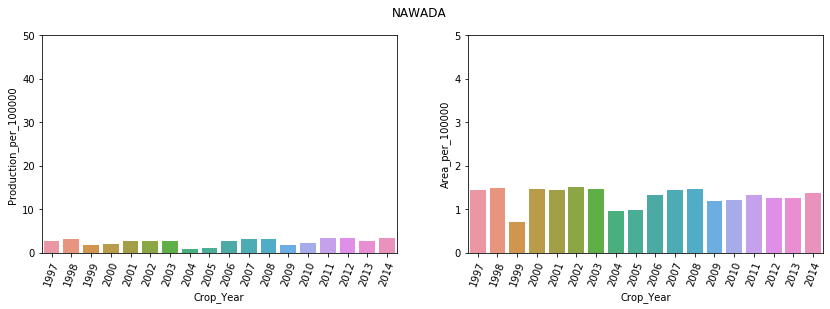

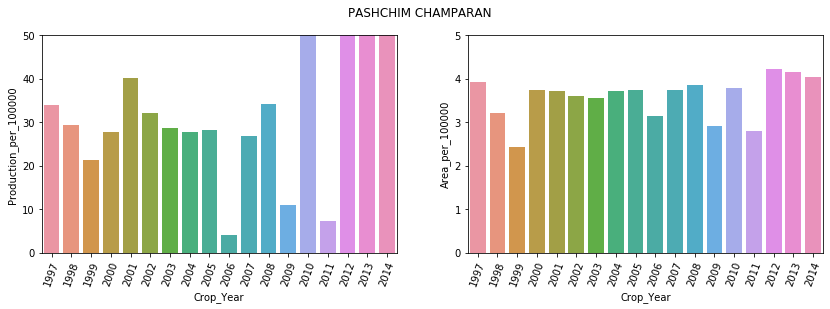

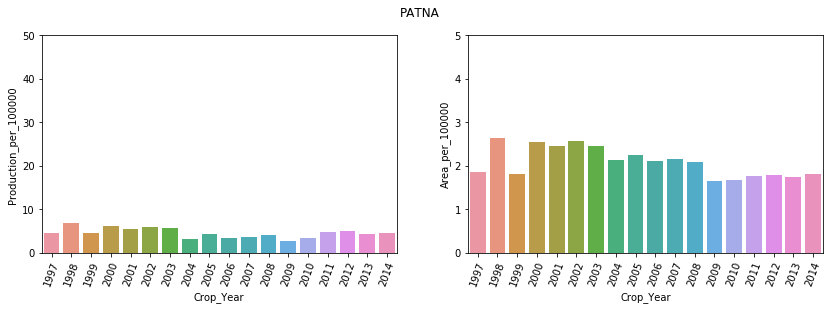

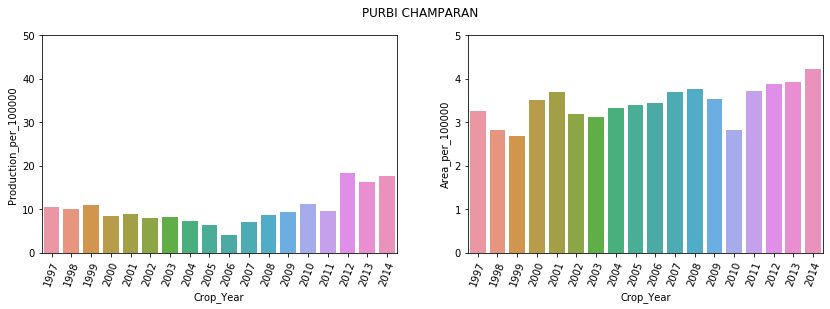

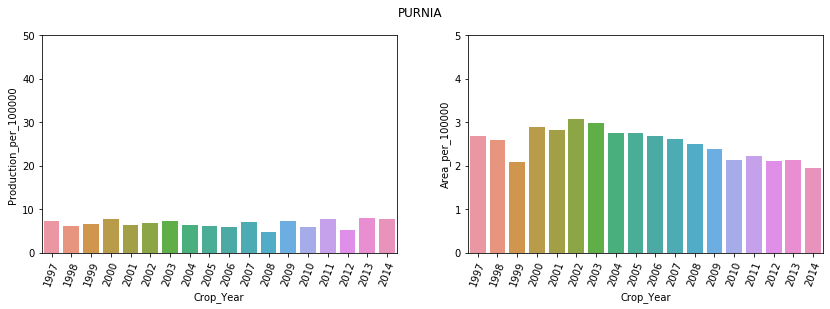

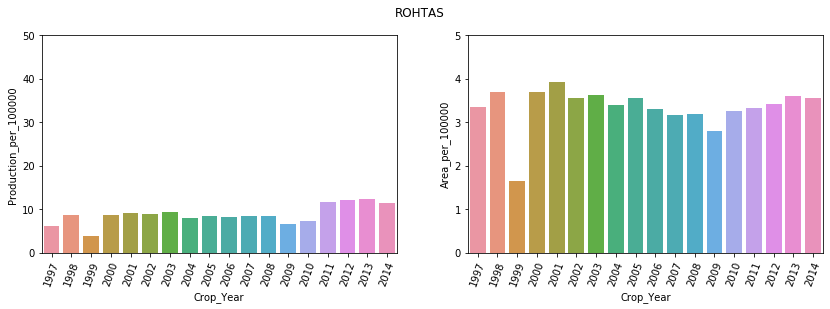

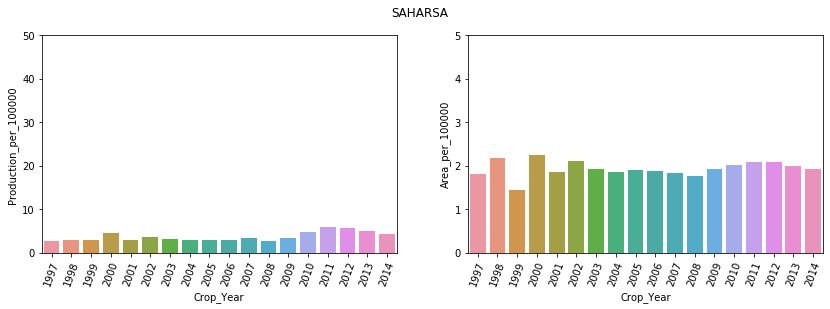

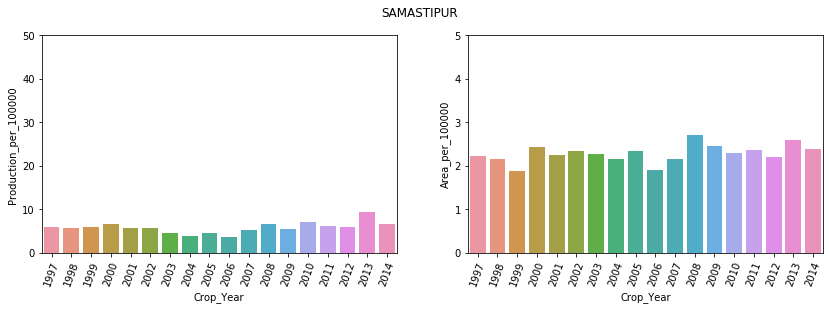

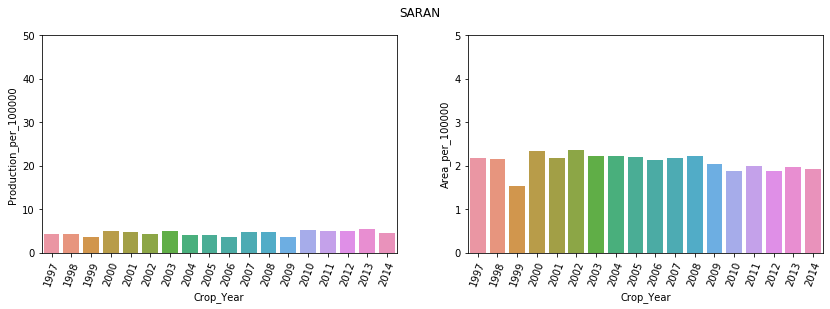

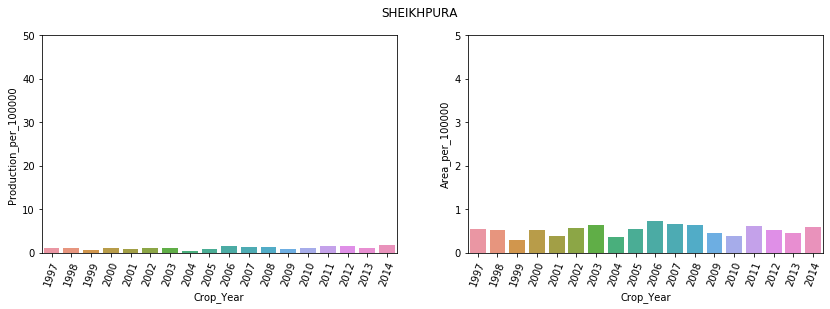

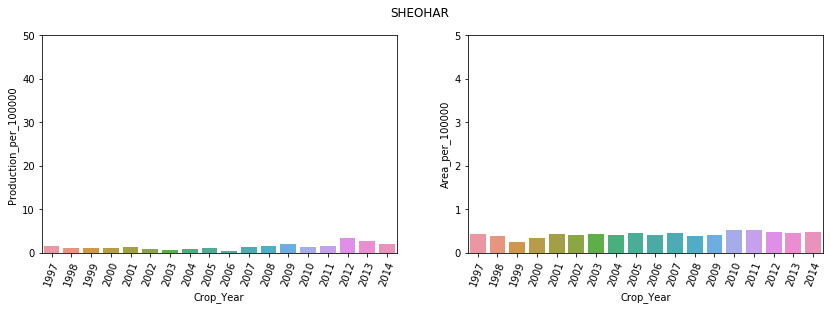

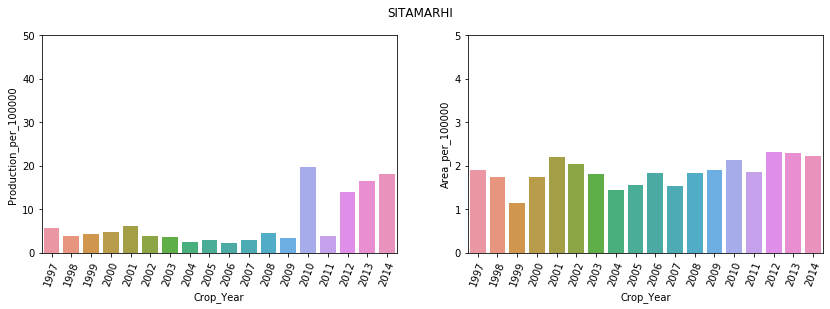

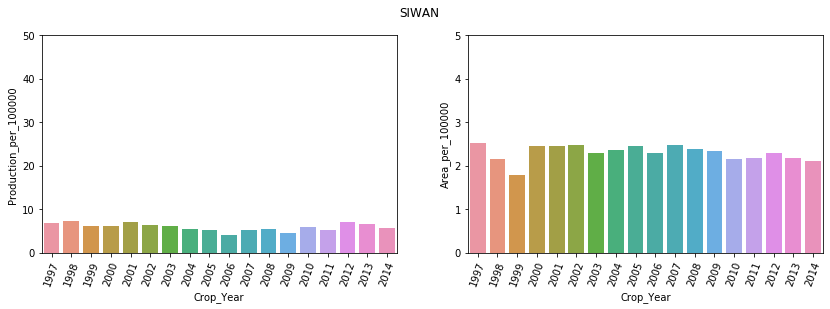

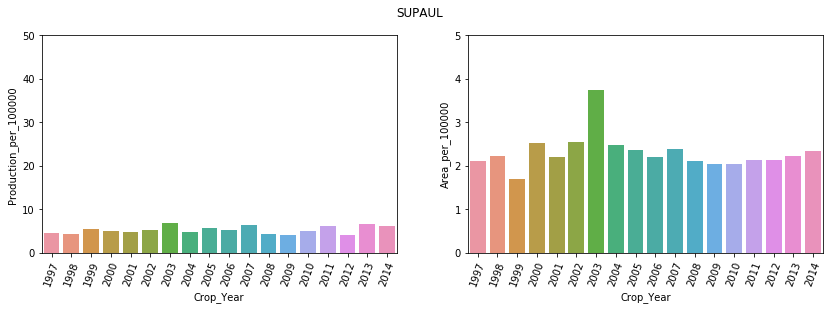

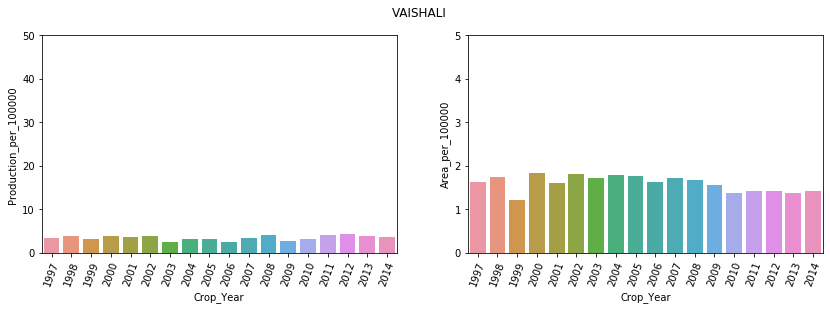

In [26]:

for i in range(38):
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    sns.barplot(production_data[list(unique_district)[i]].index,production_data[list(unique_district)[i]])
    plt.ylim(0,50)
    plt.xticks([i for i in range(18)],label=years,rotation=70)
    plt.subplot(1,2,2)
    sns.barplot(area_data[list(unique_district)[i]].index,area_data[list(unique_district)[i]])
    plt.xticks([i for i in range(18)],label=years,rotation=70)
    plt.ylim(0,5)
    plt.suptitle(list(unique_district)[i])
    plt.show()

__Basic trend of our thought that increase in area will increase in production. This seems to be followed by some of the districts but due to difference of geographical location this might be not a straight way.__ <br>
__With successive year production rate may be fall down because of degradation of farm land and area. But with increase in the tools and technology may effect this cause.__ <br>
__There is a pattern of decreasing area of farmland but due to deducton of forest to cropland some of the districts shows increase in area in a particular year.__ <br>
__Some of district are well performed in production like *PASHCHIM CHAMPARAN*,*GOPALGANJ*,*SITAMARHI*,*PURBI CHAMPARAN*.They have also greater area of agricultural land with respect to other district.__ <br>
__Many district seems to be uniform production and one district *ARWAL* is nearly have nearly NIL production as the area for agriculture is about to NIL.__


In [27]:
group_data1 = bihar_data.groupby(["District_Name","Crop"])
production_data1 = group_data1['Production_per_100000'].sum()
area_data1 =  group_data1['Area_per_100000'].sum()

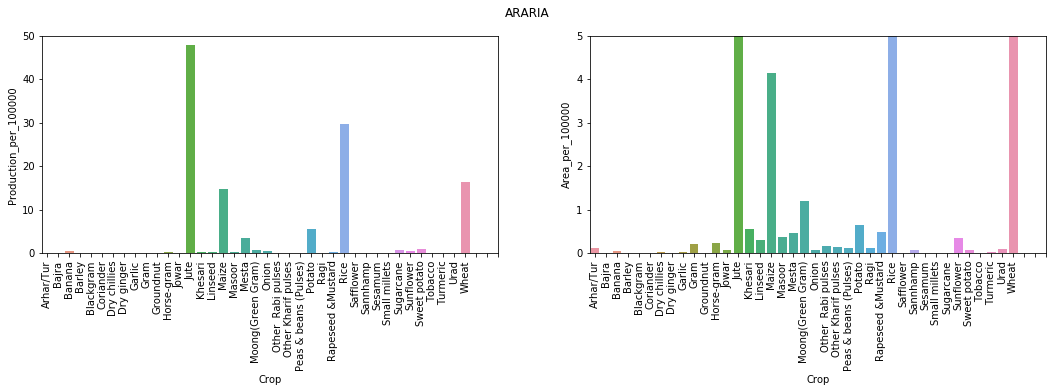

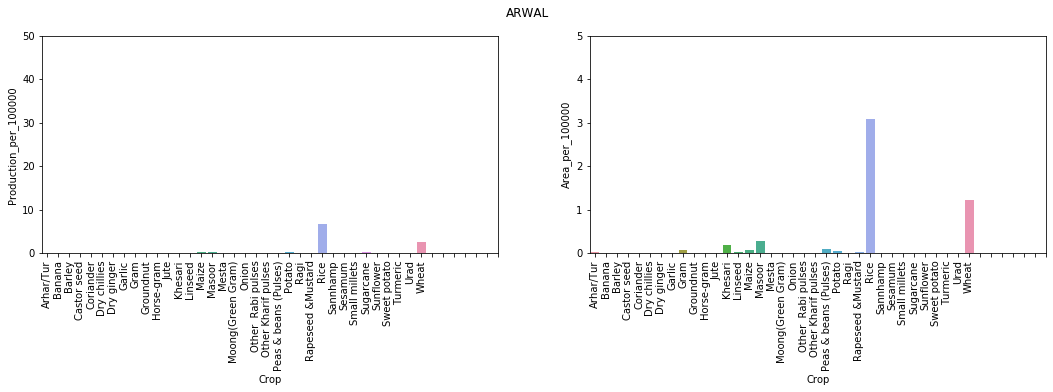

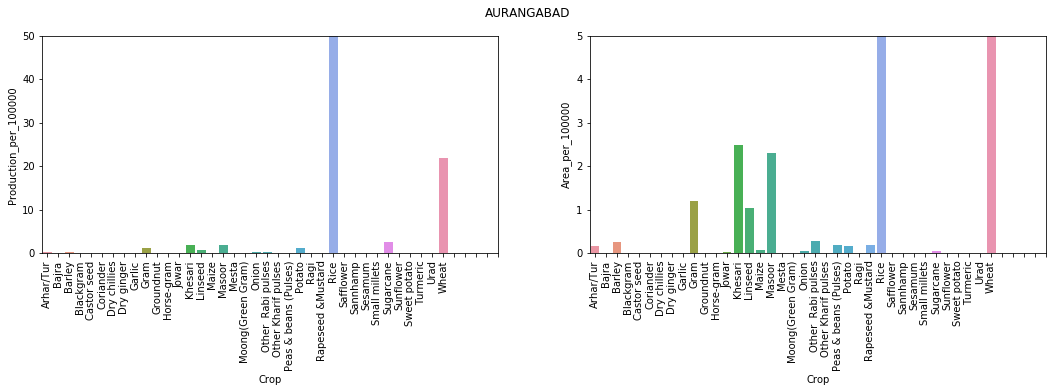

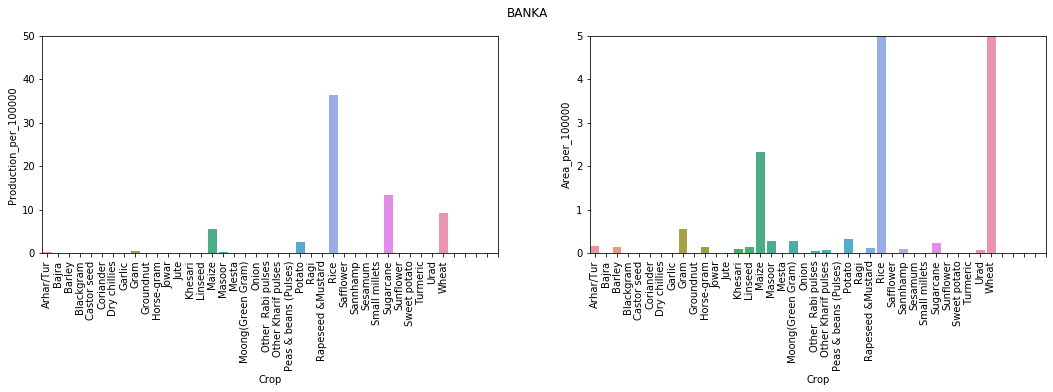

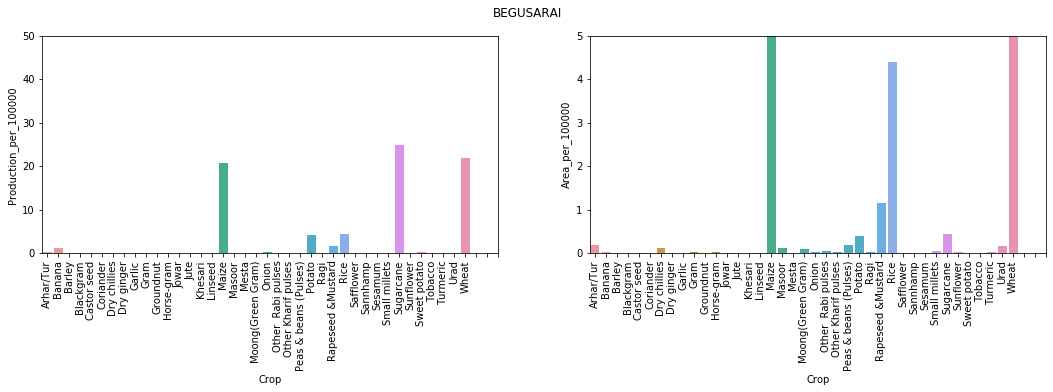

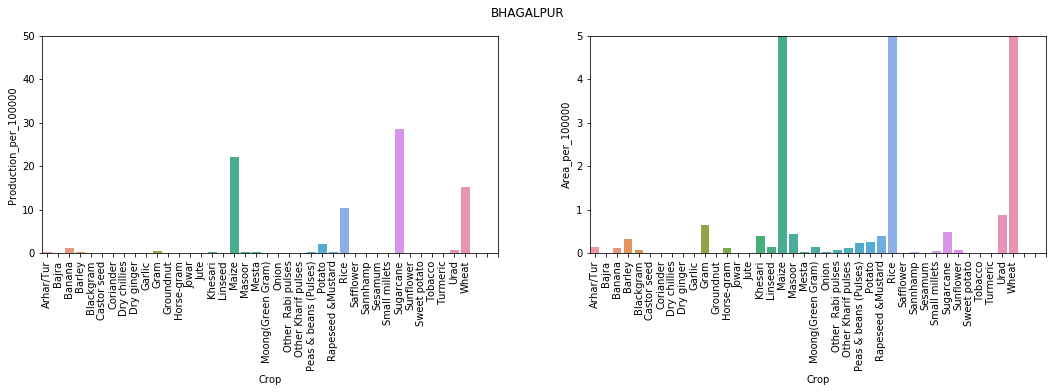

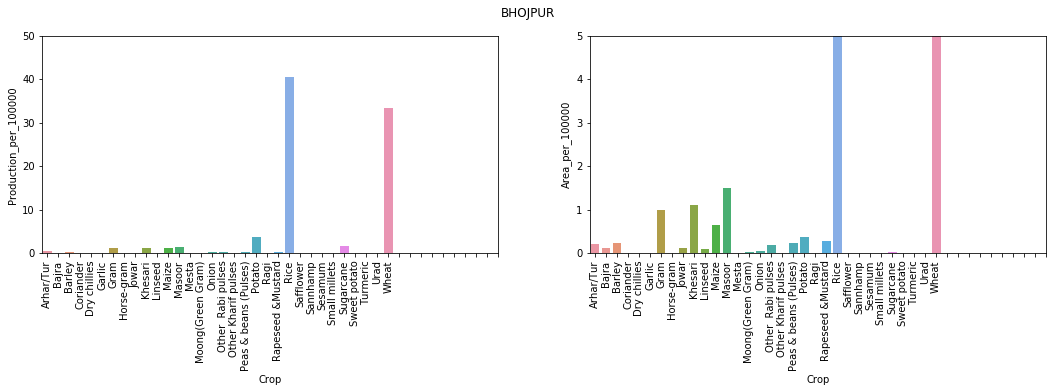

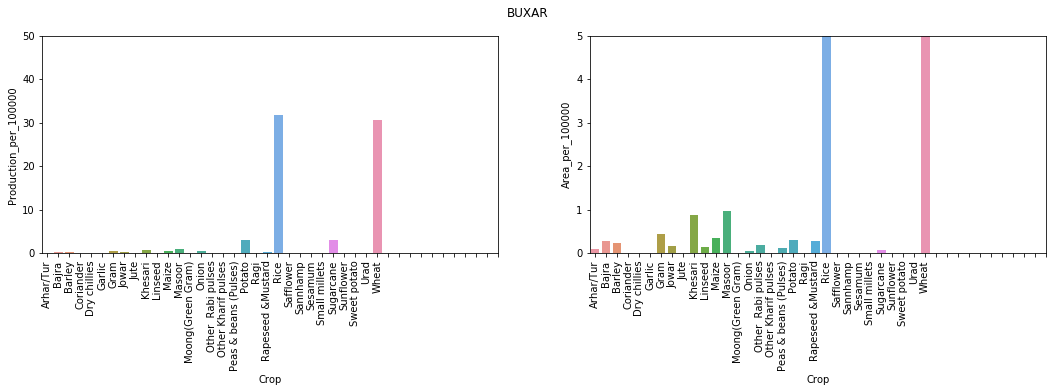

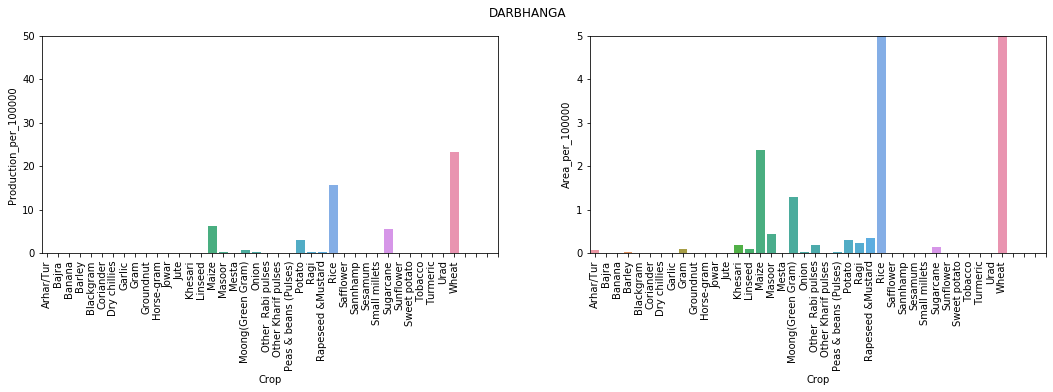

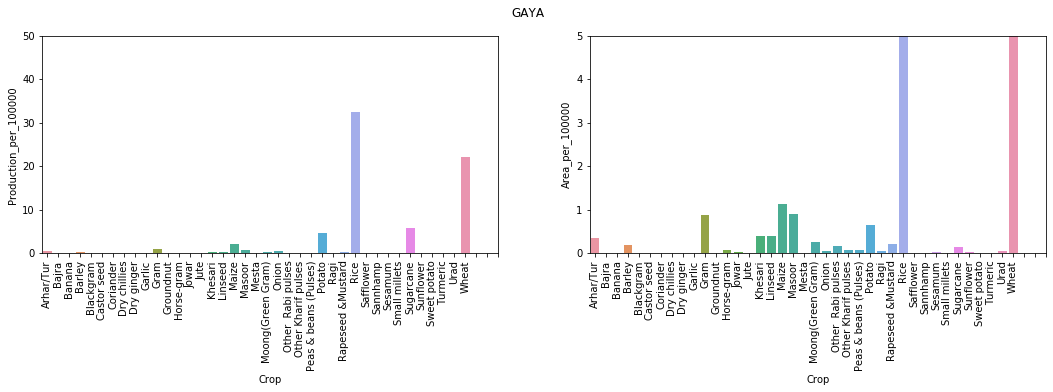

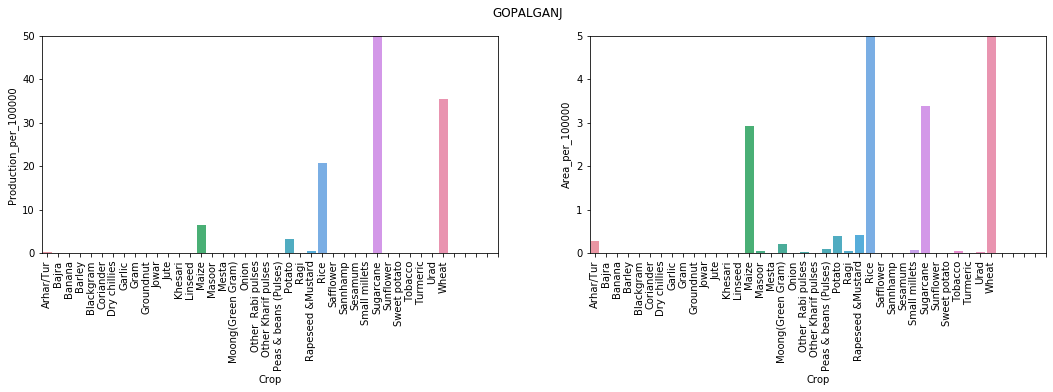

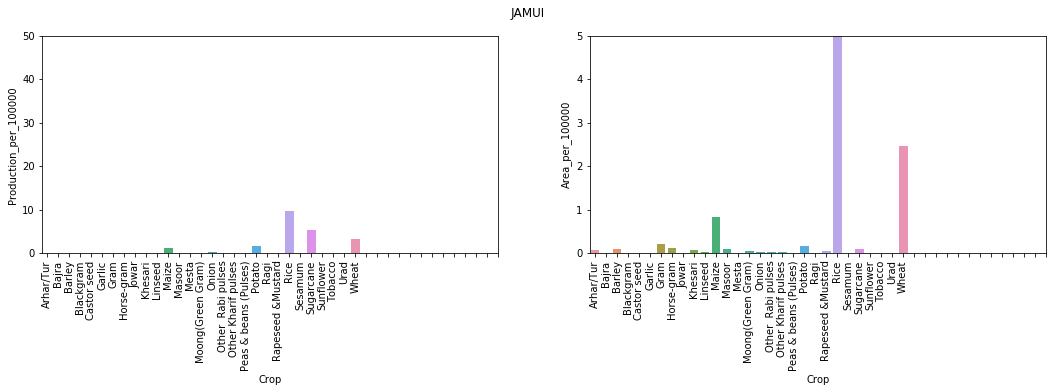

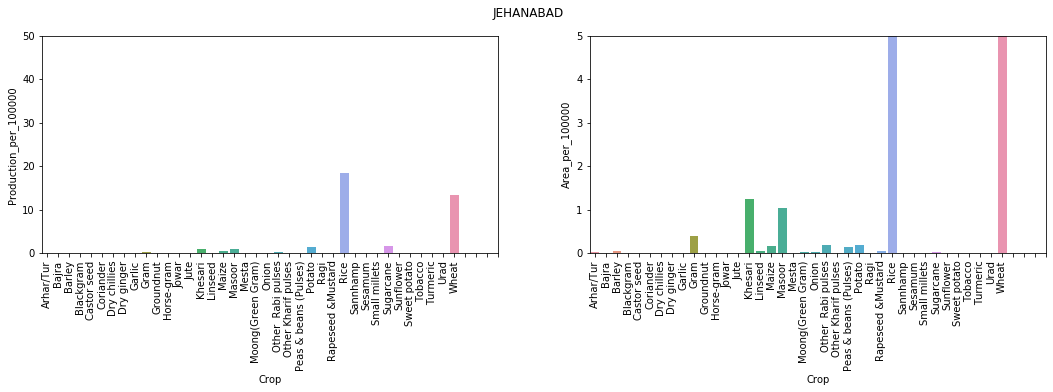

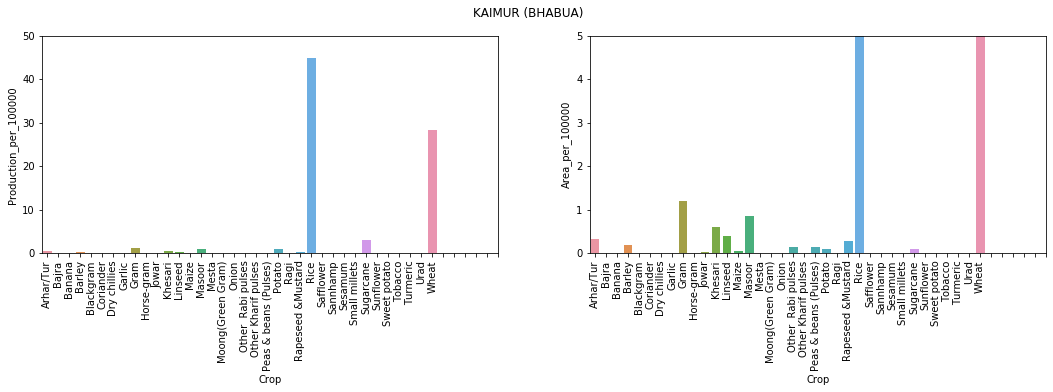

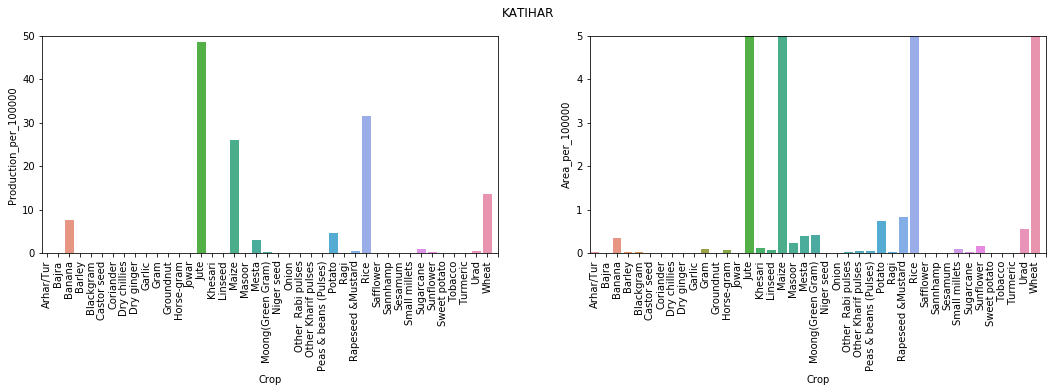

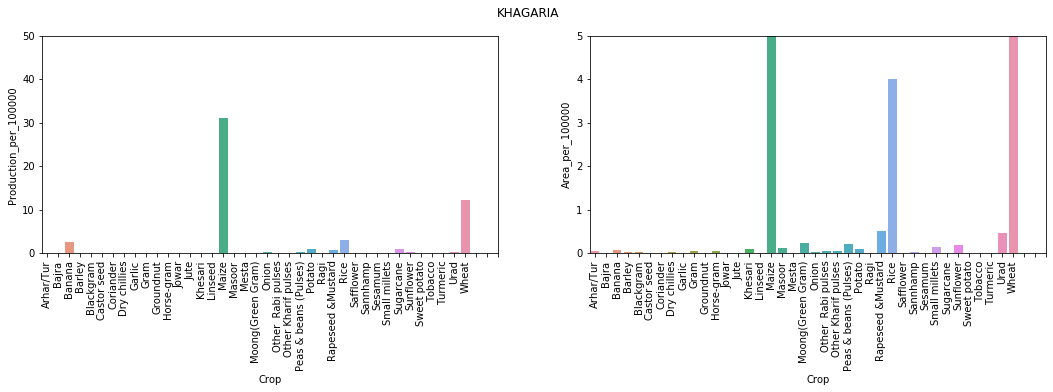

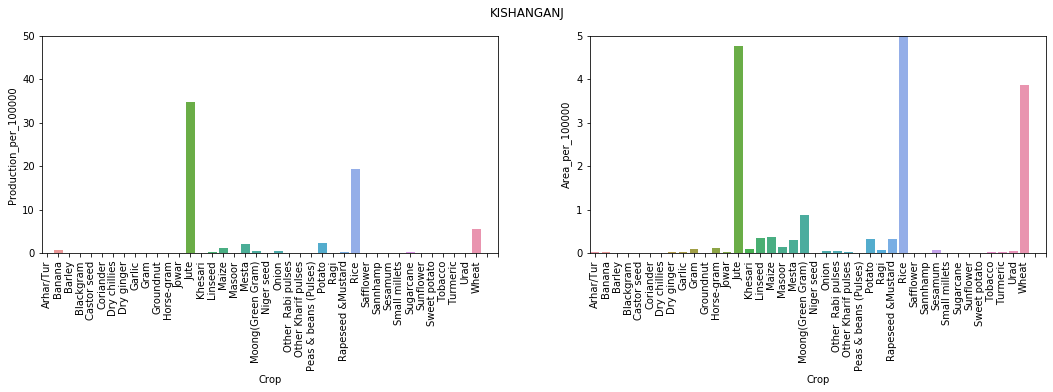

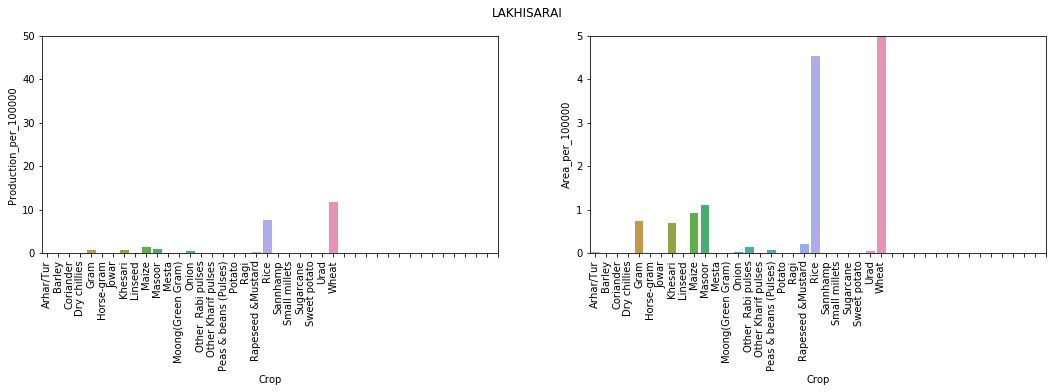

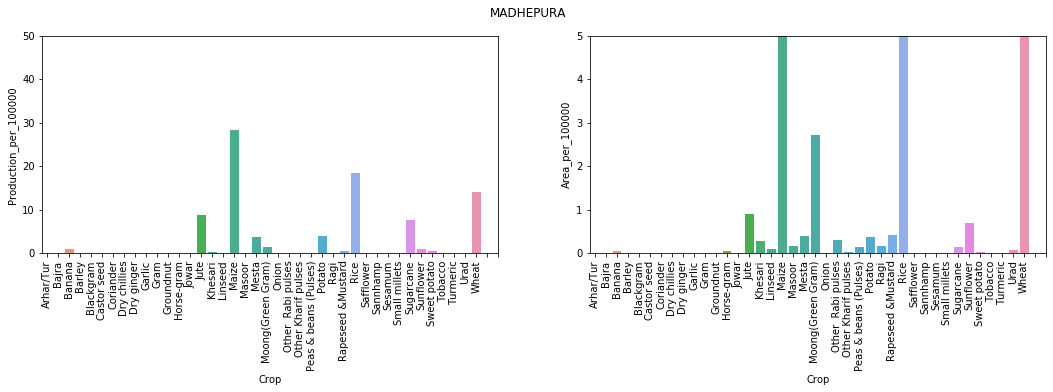

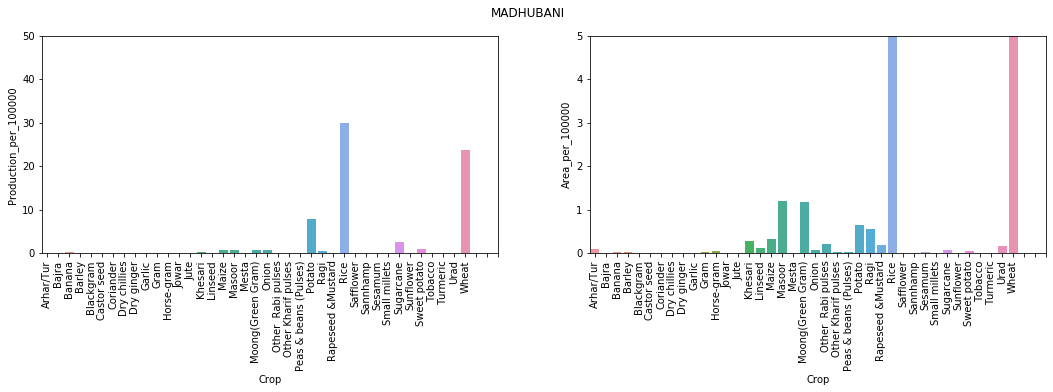

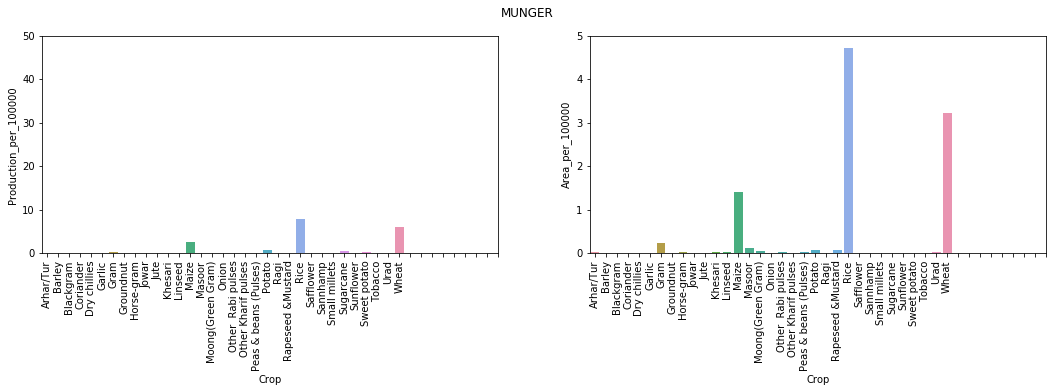

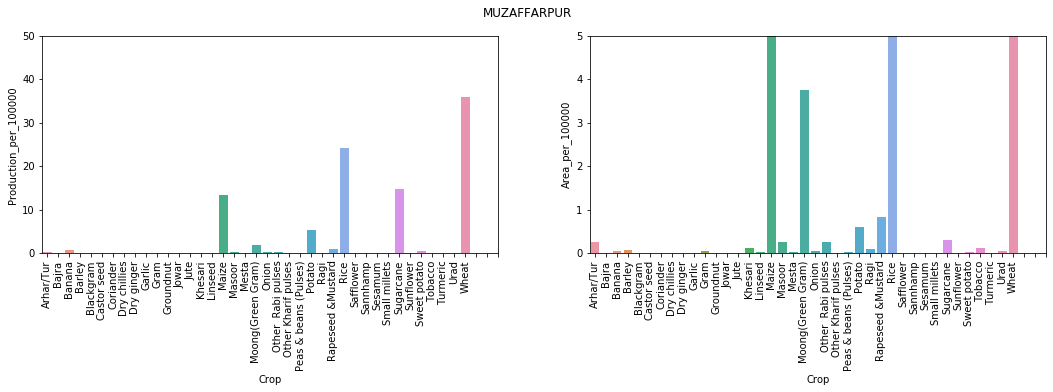

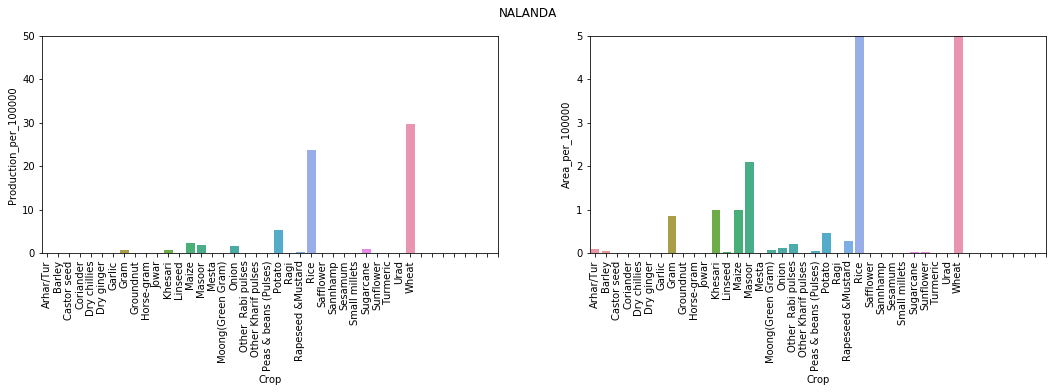

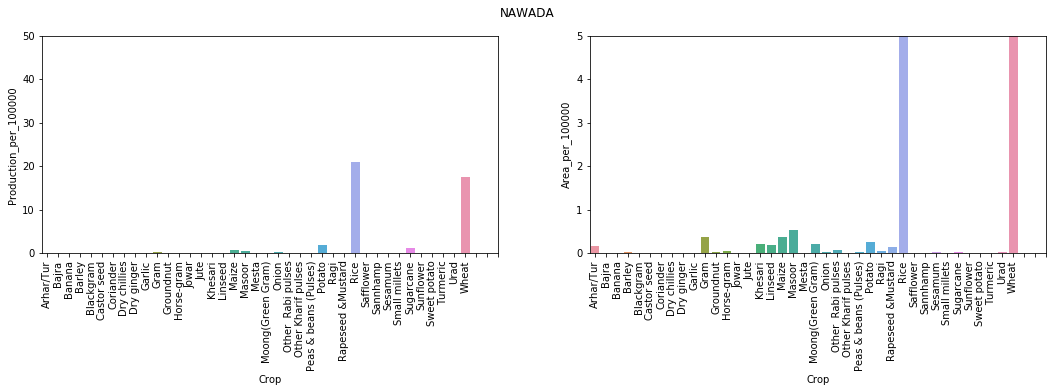

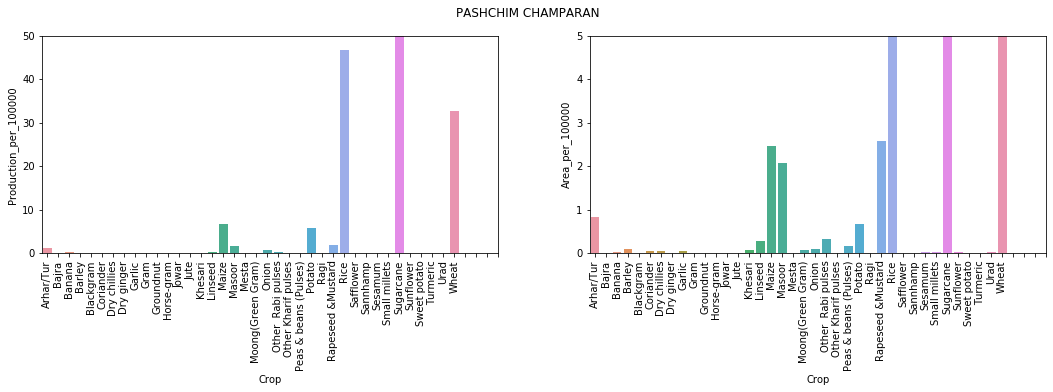

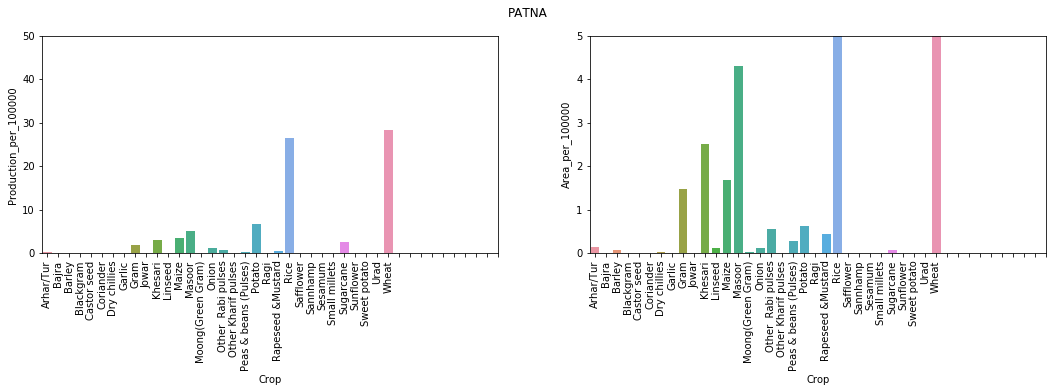

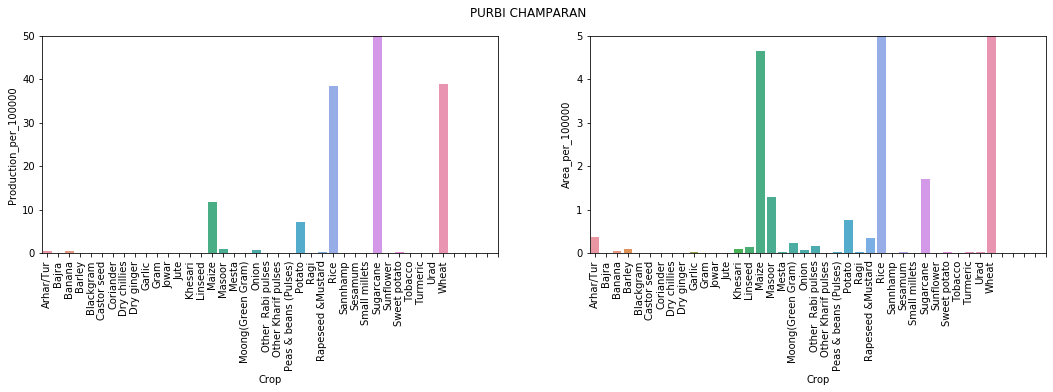

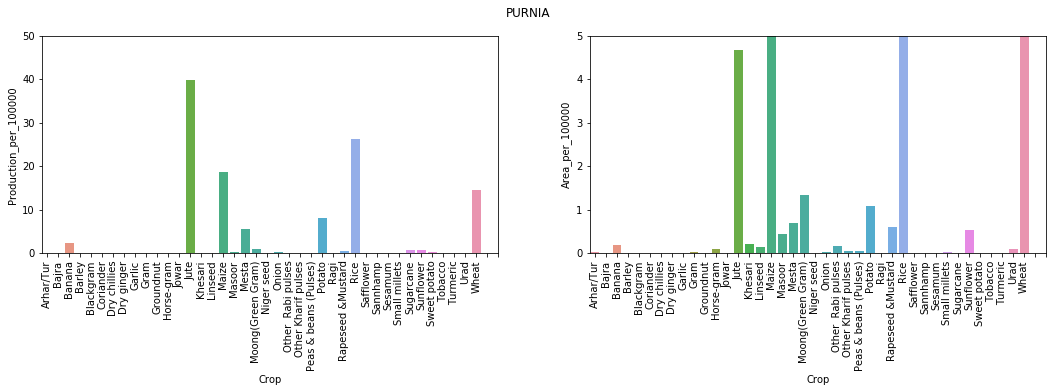

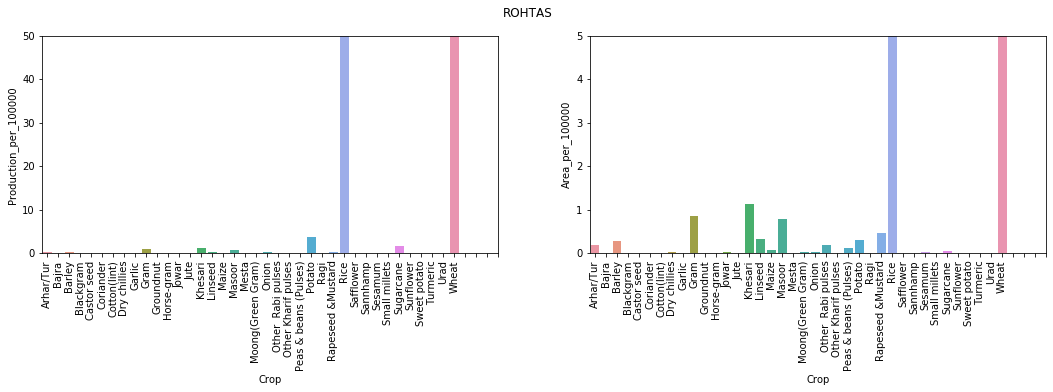

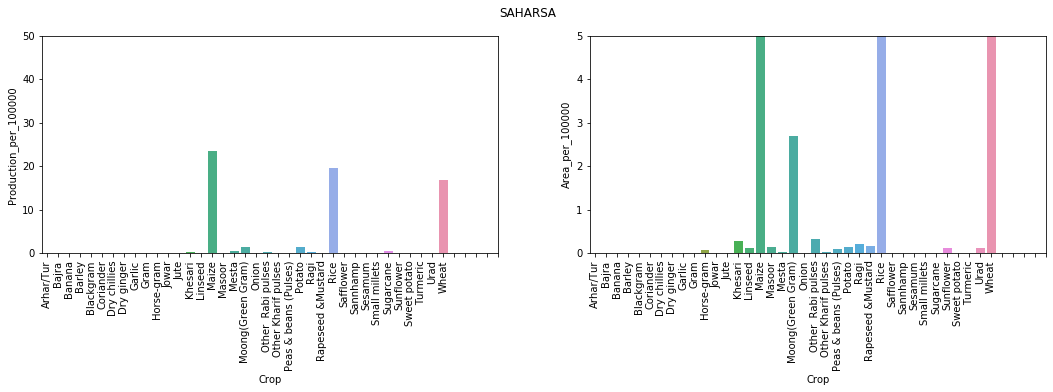

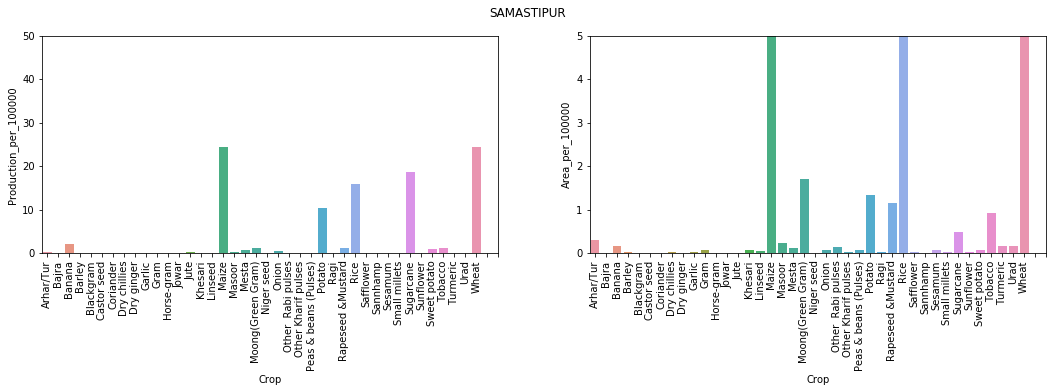

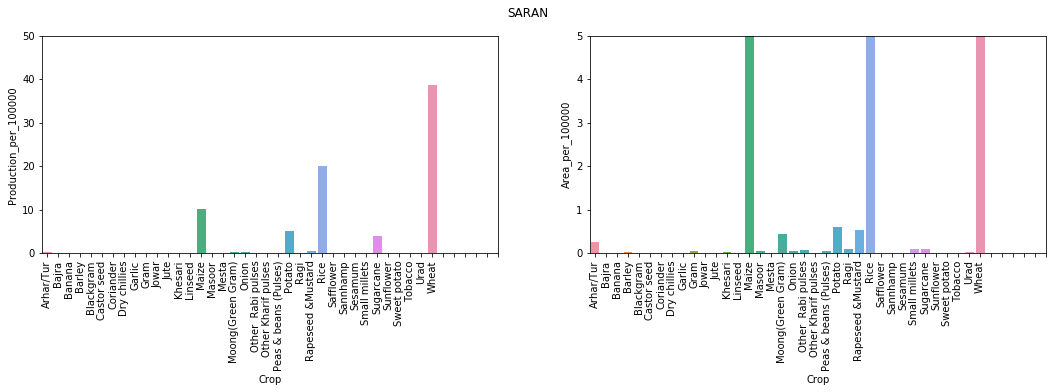

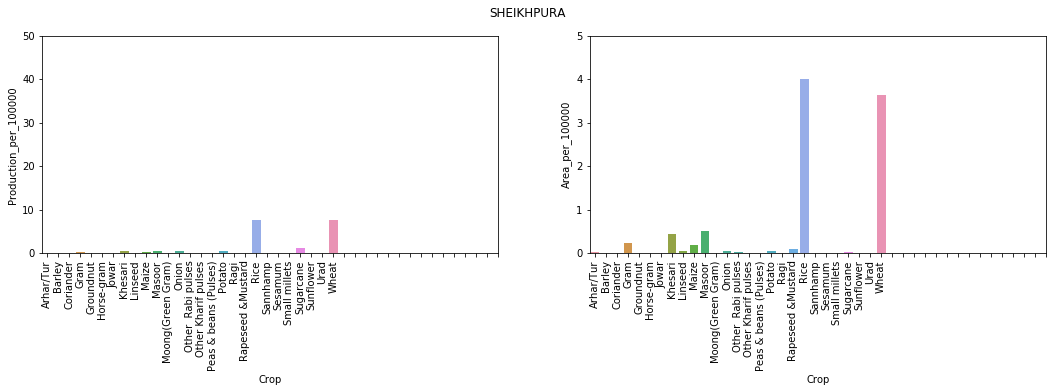

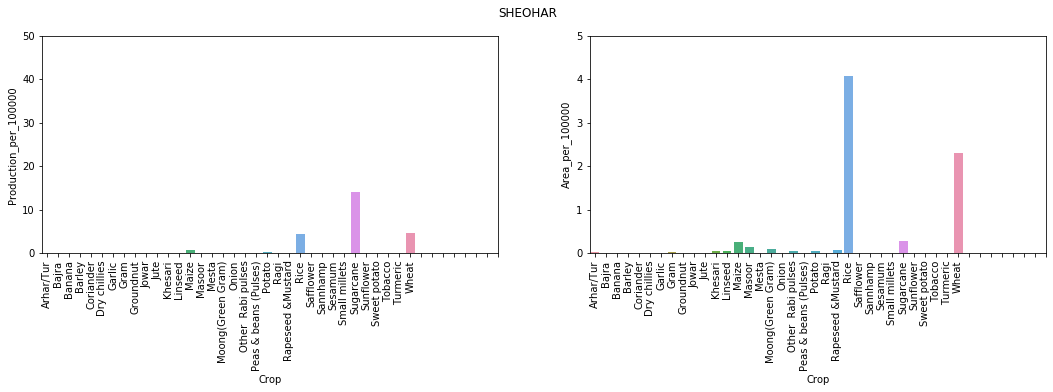

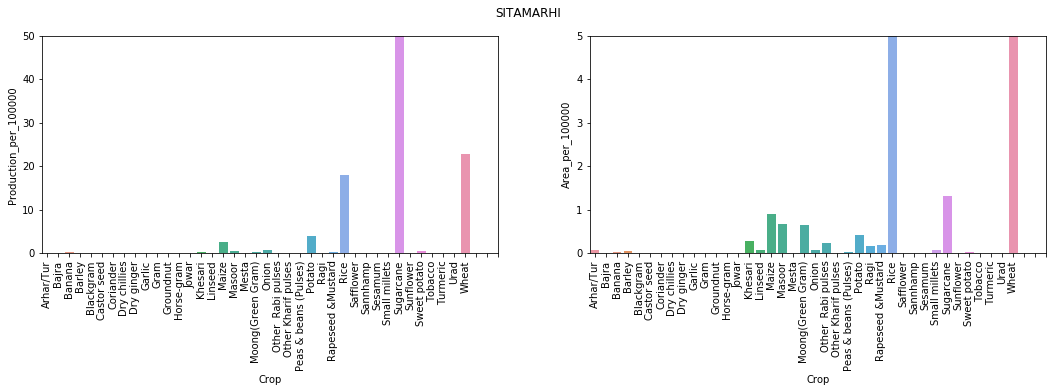

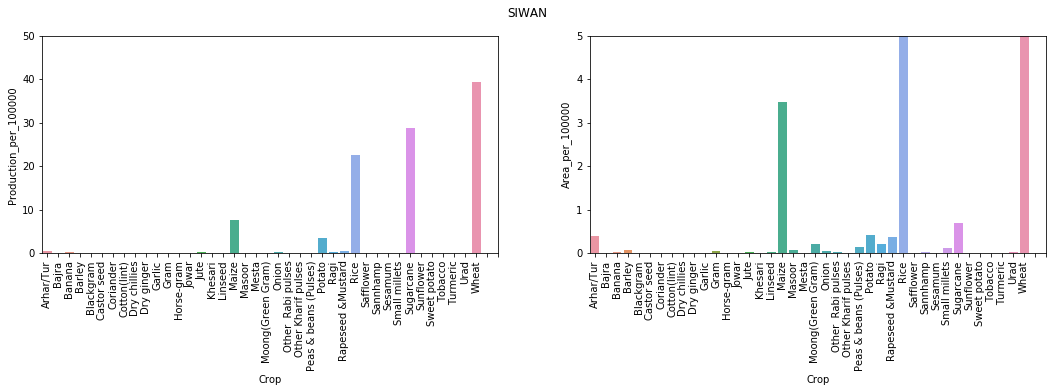

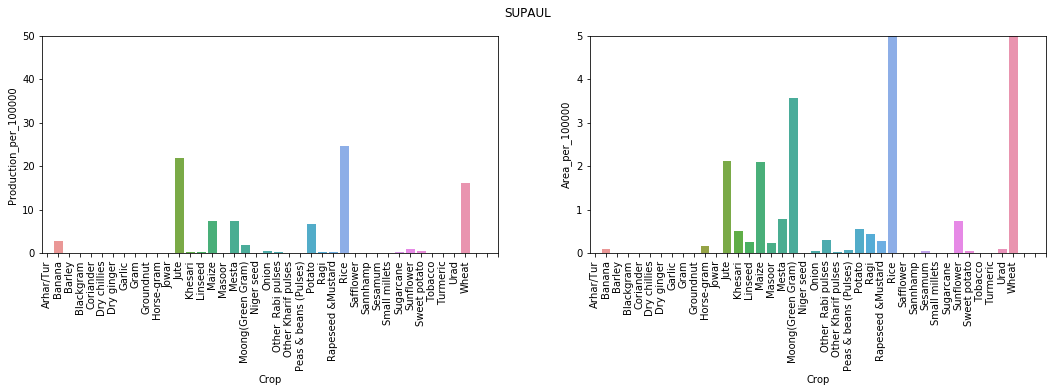

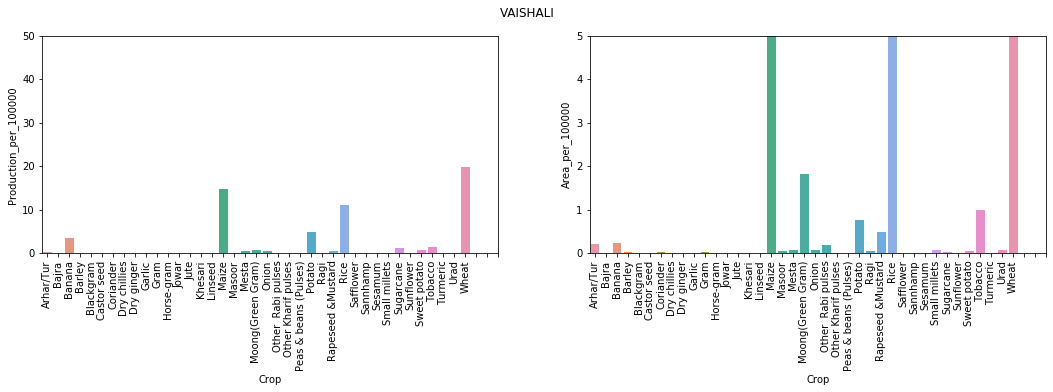

In [28]:
for i in range(38):
    plt.figure(figsize=(18,4))
    plt.subplot(1,2,1)
    sns.barplot(production_data1[unique_district[i]].index,production_data1[unique_district[i]])
    plt.ylim(0,50)
    plt.xticks([i for i in range(42)],label=unique_crop,rotation=90)
    plt.subplot(1,2,2)
    sns.barplot(area_data1[list(unique_district)[i]].index,area_data1[list(unique_district)[i]])
    plt.xticks([i for i in range(42)],label=unique_crop,rotation=90)
    plt.ylim(0,5)
    plt.suptitle(list(unique_district)[i])
    plt.show()

**It is more likely greater the area available for a crop, greater will be the production of crop. But this figure show some more variation as some of the crop has more area than the other crop but less production than other and vice versa. Lets review 
this patterns which crop has more production_rate_over_area.**

Text(0.5, 1.0, 'Production Per Area')

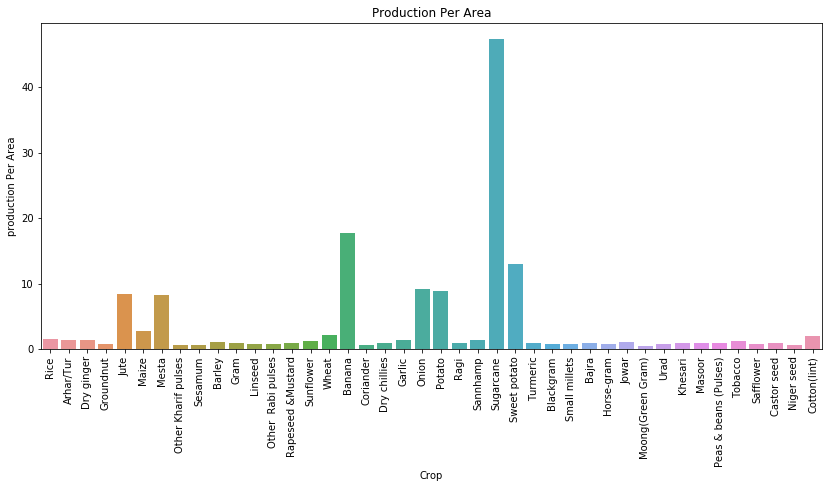

In [29]:
group_data2 = bihar_data.groupby('Crop')
production_per_area = group_data2['Production_per_100000'].sum()/group_data2['Area_per_100000'].sum()
plt.figure(figsize=(14,6))
sns.barplot(unique_crop,production_per_area[unique_crop])
plt.xticks([i for i in range(42)],labels=unique_crop,rotation=90)
plt.xlabel("Crop")
plt.ylabel("production Per Area")
plt.title("Production Per Area")

**From above figure we conclude that sugarcane has highest production per Area. Banana is at second number. And Onion,Potato,jute Mesta,Maize wheat, cotton, rice and so on decreasing number of production per area**

In [30]:
dict_value = {'Sugarcane':1,'Wheat':2,'Rice':3,'Jute':4,'Maize':5,'others':6}
majorcrop_perdist = {}
for dist in unique_district:
    dd= dict(production_data1[dist])
    majorcrop = max(dd,key=dd.get)
    if(majorcrop in dict_value.keys()):
        majorcrop_perdist[dist]=dict_value[majorcrop]
    else:
        majorcrop_perdist[dist]=6

In [31]:
labels = ['Sugarcane','Wheat','Rice','Jute','Maize','others']
labelvalue = [i for _,i in majorcrop_perdist.items()]
cropvalue = {1:0,2:0,3:0,4:0,5:0,6:0}
for i in labelvalue:
    cropvalue[i]+=1
cropvalue = [i for _,i in cropvalue.items()]

In [32]:
group_data3 = bihar_data.groupby(['Crop_Year'])
year2014 = group_data3.get_group(2014).groupby(["District_Name","Crop"])
year2014 = year2014['Production_per_100000'].sum()
majorcrop_perdist = {}
for dist in unique_district:
    dd= dict(year2014[dist])
    majorcrop = max(dd,key=dd.get)
    if(majorcrop in dict_value.keys()):
        majorcrop_perdist[dist]=dict_value[majorcrop]
    else:
        majorcrop_perdist[dist]=6
labelvalue = [i for _,i in majorcrop_perdist.items()]
cropvalue2014 = {1:0,2:0,3:0,4:0,5:0,6:0}
for i in labelvalue:
    cropvalue2014[i]+=1
cropvalue2014 = [i for _,i in cropvalue2014.items()]        

Text(0.5, 0.98, 'Percentage of major crop of district')

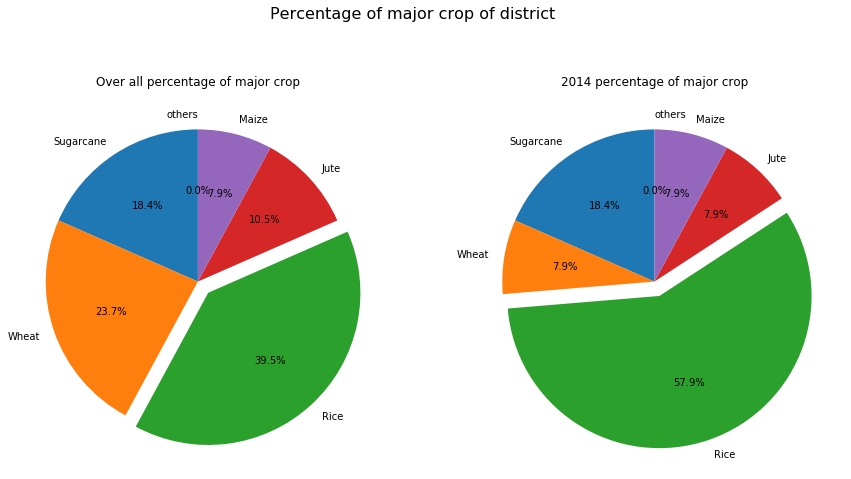

In [33]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.pie(x = cropvalue,labels=labels,startangle=90,explode =(0,0,0.1,0,0,0), autopct='%1.1f%%')
plt.title("Over all percentage of major crop")
plt.subplot(122)
plt.pie(x = cropvalue2014,labels=labels,startangle=90,explode =(0,0,0.1,0,0,0), autopct='%1.1f%%')
plt.title("2014 percentage of major crop")
plt.suptitle("Percentage of major crop of district",fontsize=16)
# plt.show()

**In the piechart overall major crop of bihar comes out to be Rice. For each district list of overall major crop is Rice, Wheat, Sugarcane, Jute and Maize.**

In [34]:
major_bihar_data = bihar_data[[True if(bihar_data.Crop.values[i] in labels) else False for i in range(bihar_data.shape[0])]]

<Figure size 1080x432 with 0 Axes>

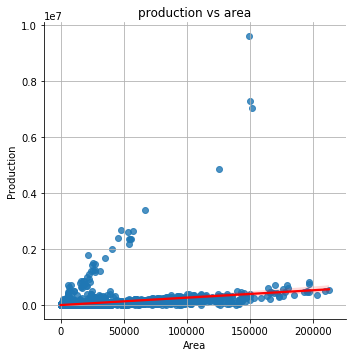

In [35]:
plt.figure(figsize=(15,6))
sns.lmplot('Area','Production',data=major_bihar_data,line_kws={'color':'red'})
plt.title('production vs area')
plt.grid()

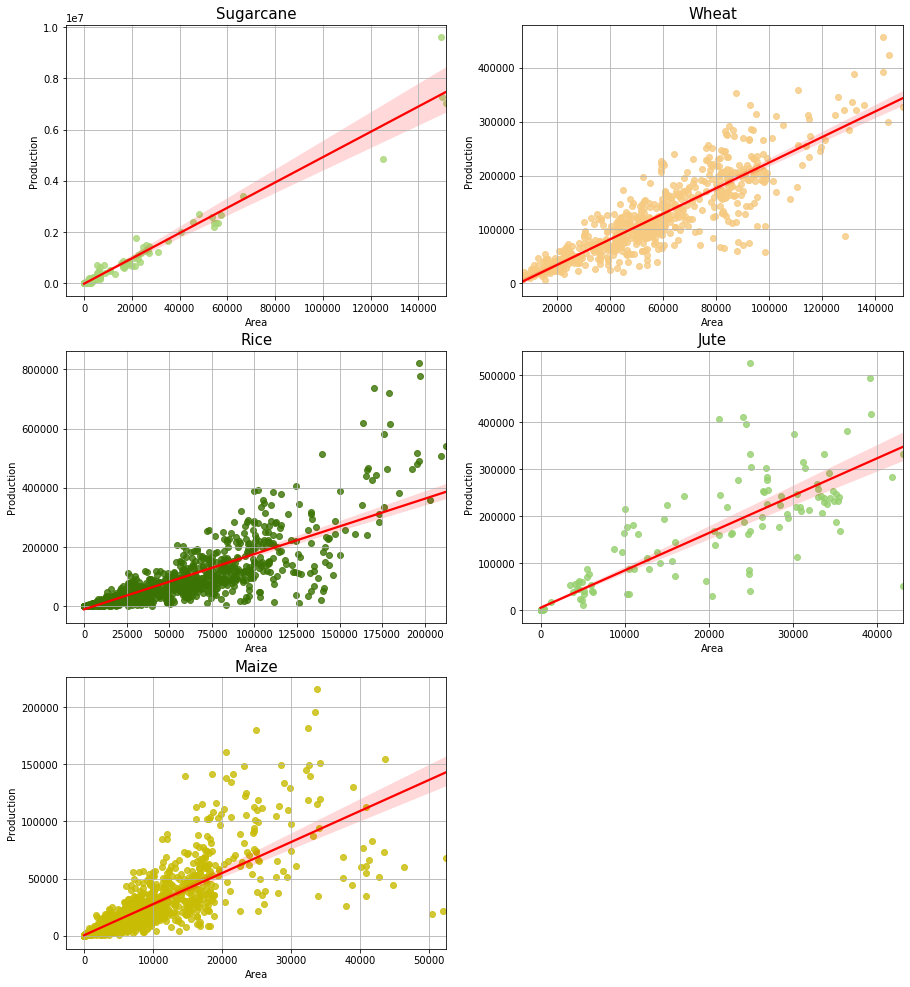

In [36]:
color_pallet = ["#a8d677","#f6ca80","#3b7304","#96d06e","#c9bc04"]
plt.figure(figsize=(15,17))
for i in range(5):
    plt.subplot(3,2,i+1)
    sns.regplot('Area','Production',color=color_pallet[i],data=major_bihar_data[major_bihar_data.Crop == labels[i]],line_kws={'color':'red'})
    plt.title(labels[i],fontsize = 15)
    plt.grid()


**All major crops show linear relation between area and their production**